# Project: Fundamentals of Information Systems 

### Introduction

This data has been gathered at **two solar power plants** in India over a **34 day** period. It has **two** pairs of files - each pair has **one power generation dataset** and **one sensor readings dataset**. 
- The **power generation datasets** are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. 
- The **sensor data** is gathered at a plant level - a single array of sensors optimally placed at the plant.

### Output

**Questions.**
- What is the **mean** value of **daily yield**? 
- What is the **total irradiation per day**? 
- What is the **max ambient** and **module temperature**? 
- **How many inverters** are there **for each plant**? 
- What is the **maximum/minimum amount** of **DC/AC Power generated** in a **time interval/day**? 
- **Which inverter** (source_key) has produced **maximum DC/AC power**? 
- **Rank the inverters** based on the **DC/AC power** they produce? Is there **any missing data**?


- **Graphs** that explain the patterns for attributes independent of other variables. These will usually be tracked as changes of attributes against DATETIME, DATE, or TIME. 

**Examples.** How is DC or AC Power changing as time goes by? how is irradiation changing as time goes by? how are ambient and module temperature changing as time goes by? how does yield change as time goes by? Explore plotting variables against different granularities of DATETIME and which is the best option for each variable.

### Variables

##### Power generation data
- DATE_TIME: Date and time for each observation. Observations recorded at 15 minute intervals.
 
- PLANT_ID: Plant ID - this will be common for the entire file.

- SOURCE_KEY: Source key in this file stands for the inverter id.

- DC_POWER: Amount of DC power **(corrente continua)** generated by the inverter (source_key) in this 15 minute interval. Units - kW.

- AC_POWER: Amount of AC power **(corrente alternata)** generated by the inverter (source_key) in this 15 minute interval. Units - kW.

- DAILY_YIELD: Daily yield is a cumulative sum of power generated on that day, till that point in time.

- TOTAL_YIELD: This is the total yield for the inverter till that point in time.

##### Weather sensor data
- DATE_TIME: Date and time for each observation. Observations recorded at 15 minute intervals.

- PLANT_ID: Plant ID - this will be common for the entire file.

- SOURCE_KEY: Stands for the sensor panel id. This will be common for the entire file because there's only one sensor panel for the plant.

- AMBIENT_TEMPERATURE: This is the ambient temperature at the plant.

- MODULE_TEMPERATURE: There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.

- IRRADIATION: Amount of irradiation for the 15 minute interval.

###################################################################################################################

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns

### Data Exploration

In [2]:
p1_gen = pd.read_csv('./Plant_1_Generation_Data.csv')
p1_wea = pd.read_csv('./Plant_1_Weather_Sensor_Data.csv')
p2_gen = pd.read_csv('./Plant_2_Generation_Data.csv')
p2_wea = pd.read_csv('./Plant_2_Weather_Sensor_Data.csv')

In [3]:
print("Shape of the table for plant 1 generation data: ", p1_gen.shape)
print("Shape of the table for plant 2 generation data: ",p2_gen.shape)
print("Name of the columns for the dataframes: \n",list(p1_gen.columns))
assert(np.all(p1_gen.columns == p2_gen.columns))  # just making sure they have the same columns

Shape of the table for plant 1 generation data:  (68778, 7)
Shape of the table for plant 2 generation data:  (67698, 7)
Name of the columns for the dataframes: 
 ['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']


In [4]:
print("Shape of the table for weather sensor plant 1: ", p1_wea.shape)
print("Shape of the table for weather sensor plant 2: ", p2_wea.shape)
print("Column names for weather sensor tables: \n", list(p1_wea.columns))
assert(np.all(p1_wea.columns == p2_wea.columns)) # just making sure they have the same columns

Shape of the table for weather sensor plant 1:  (3182, 6)
Shape of the table for weather sensor plant 2:  (3259, 6)
Column names for weather sensor tables: 
 ['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']


In [5]:
p1_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [6]:
p2_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [7]:
p1_wea.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [8]:
p2_wea.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


### Missing Data

Since data is being collected every 15 minutes for 34 days we'd expect to have 3264 (34\*24\*4) entries for every source key. But this is not the case:

In [9]:
p1_gen.groupby("SOURCE_KEY").DATE_TIME.count()

SOURCE_KEY
1BY6WEcLGh8j5v7    3154
1IF53ai7Xc0U56Y    3119
3PZuoBAID5Wc2HD    3118
7JYdWkrLSPkdwr4    3133
McdE0feGgRqW7Ca    3124
VHMLBKoKgIrUVDU    3133
WRmjgnKYAwPKWDb    3118
YxYtjZvoooNbGkE    3104
ZnxXDlPa8U1GXgE    3130
ZoEaEvLYb1n2sOq    3123
adLQvlD726eNBSB    3119
bvBOhCH3iADSZry    3155
iCRJl6heRkivqQ3    3125
ih0vzX44oOqAx2f    3130
pkci93gMrogZuBj    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
uHbuxQJl8lW7ozc    3125
wCURE6d3bPkepu2    3126
z9Y9gH1T5YWrNuG    3126
zBIq5rxdHJRwDNY    3119
zVJPv84UY57bAof    3124
Name: DATE_TIME, dtype: int64

Data is missing, we don't always have data entries every 15 minutes.

It's going to be easier to appropriatly analyze data, calculate aggregates and create plots while having the same number of entries for all inverters/sensors. This will also possibly allow us to explain incongruencies between variables. Rows will be added to the dataframes to account for the missing entries.

### Data Preparation and Clean up

Since the inverters' identifiers are complex alphanumeric strings, we'll change them to better handle them:

In [10]:
def simplify_source_keys(df,n) :
    '''Changes the complex source keys identifiers to simpler/easier to handle identifiers.
    
    Args:
        df (pd.DataFrame): the dataframe to modify
        n (int): number of the plant we're referring to
    
    Returns:
        dict: dictionary to link old inverters' identifiers (keys) to new identifiers (values)
    '''
    repl_dict = {} 
    for i,j in enumerate(sorted(list(set(df["SOURCE_KEY"])))):
        repl_dict[j] = "s"+str(i)+"_gen"+str(n)
    df["SOURCE_KEY"] = df["SOURCE_KEY"].replace(repl_dict)
    return repl_dict

In [11]:
inverters_ids_1 = simplify_source_keys(p1_gen,1) 
inverters_ids_2 = simplify_source_keys(p2_gen,2)

The DATE_TIME columns of the two inverters' dataframes display the date and hour of the data entry with two different formats, we'll convert this to a unique format:

In [12]:
def convert_dates(date):
    '''Converts date string from format %d-%m-%Y %H:%M to date string format %Y-%m-%d %H:%M:%S.
    
    Args:
        date (string): the date string to convert
        
    Returns:
        string
    '''
    return date[6:10]+"-"+date[3:5]+"-"+date[:2]+date[10:]+":00"

In [13]:
p1_gen.DATE_TIME = p1_gen.DATE_TIME.apply(convert_dates)

p1_gen["DATE_TIME"] = p1_gen["DATE_TIME"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
p2_gen["DATE_TIME"] = p2_gen["DATE_TIME"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

Missing data entries will be now added to the dataframes:

In [14]:
def add_missing_entries(df):
    '''Adds data missing from the df dataframe, in order to have entries every 15 minutes for all the sources.
    
    Args:
        df (pd.DataFrame): dataframe with incomplete data
    
    Returns:
        new_df (pd.DataFrame): dataframe with complete timestamps for every source
    '''
    
    init = datetime.datetime(year = 2020, month = 5, day = 15, hour = 0, minute = 0)
    finit = datetime.datetime(year = 2020, month = 6, day = 18, hour = 0, minute = 0)
    new_DATE_TIME = np.arange(init, finit, datetime.timedelta(minutes = 15)).astype(datetime.datetime)
    new_DATE_TIME = pd.DataFrame(new_DATE_TIME,columns=["DATE_TIME"])
    
    new_df = pd.DataFrame(columns=list(df.columns))
    
    for source in df.SOURCE_KEY.unique():
        p1_s = df.loc[df['SOURCE_KEY'] == source]
        p1_s = pd.merge(p1_s, new_DATE_TIME, on = 'DATE_TIME', how = 'right')
        p1_s.loc[p1_s['SOURCE_KEY'].isna() == True, 'SOURCE_KEY'] = source
        new_df = pd.concat([new_df,p1_s],ignore_index=True)
    
    return new_df

In [15]:
p1_gen = add_missing_entries(p1_gen)
p2_gen = add_missing_entries(p2_gen)

It's useful to split the DATE_TIME column in a date column and a time column, since we're going to plot against different timeframes later on. Dataframes gets also sorted by date and time:

In [16]:
p1_gen["DATE"] = p1_gen["DATE_TIME"].apply(lambda x: x.date())
p2_gen["DATE"] = p2_gen["DATE_TIME"].apply(lambda x: x.date())

p1_gen["TIME"] = p1_gen["DATE_TIME"].apply(lambda x: x.time())
p2_gen["TIME"] = p2_gen["DATE_TIME"].apply(lambda x: x.time())

p1_gen["DATE_TIME"] = p1_gen["DATE_TIME"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
p2_gen["DATE_TIME"] = p2_gen["DATE_TIME"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))

p1_gen = p1_gen.sort_values(["DATE", "TIME"]).reset_index(drop=True)
p2_gen = p2_gen.sort_values(["DATE", "TIME"]).reset_index(drop=True)

Now we have NaN values in the dataframes corresponding to the previously missing entries:

In [17]:
p1_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71808 entries, 0 to 71807
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    71808 non-null  object 
 1   PLANT_ID     68778 non-null  float64
 2   SOURCE_KEY   71808 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
 7   DATE         71808 non-null  object 
 8   TIME         71808 non-null  object 
dtypes: float64(5), object(4)
memory usage: 4.9+ MB


In [18]:
p2_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71808 entries, 0 to 71807
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    71808 non-null  object 
 1   PLANT_ID     67698 non-null  float64
 2   SOURCE_KEY   71808 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
 7   DATE         71808 non-null  object 
 8   TIME         71808 non-null  object 
dtypes: float64(5), object(4)
memory usage: 4.9+ MB


We'll now fill in the appropriate values for all the columns:
- **PLANT_ID** will be filled with the corresponding unique id for the two dataframes
- A new column **MISS_VAL** is going to be created, denoting if the data entry was previously missing. This might come in handy later on aswell.
- **DC_POWER** and **AC_POWER** track how much power has been produced in the last 15 minutes (they're not cumulative). Missing data will be set to 0 instead of NaN, as we can't know how much power has been produced every 15 minutes.

In [19]:
p1_gen.loc[p1_gen['PLANT_ID'].isna() == True, 'PLANT_ID'] = 4135001.0
p2_gen.loc[p2_gen['PLANT_ID'].isna() == True, 'PLANT_ID'] = 4136001.0

p1_gen["MISS_VAL"] = np.where(p1_gen["DC_POWER"].isna(),1,0)
p2_gen["MISS_VAL"] = np.where(p2_gen["DC_POWER"].isna(),1,0)

p1_gen.loc[p1_gen['DC_POWER'].isna() == True, 'DC_POWER':'AC_POWER'] = 0
p2_gen.loc[p2_gen['DC_POWER'].isna() == True, 'DC_POWER':'AC_POWER'] = 0

Finally **DAILY_YIELD** and **TOTAL_YIELD** are cumulative variables so we have to treat them accordingly while dealing with missing data.
In particular, **DAILY_YIELD** is a daily cumulative measure and it gets resetted everyday, while **TOTAL_YIELD** is a cumulative measure of the total power produced since even before the data available here was gathered.

The **DAILY_YIELD** column is problematic to deal with. In some cases, as we would expect, it gets resetted at midnight or really close to it, allowing us to easily pinpoint the daily maximum by simply selecting the last non-missing value of the day (first graph in the figure below); other times (second graph of the figure below, and this is the case for most inverters in the second plant) the daily yield doesn't get resetted until later in the morning at a non-fixed hour. In this case it's not possible anymore to simpy select the maximum daily_yield obtained in the day as we risk to select the maximum daily yield of the previous day.

In [20]:
p1_gen.loc[p1_gen["DAILY_YIELD"].isna(),"DAILY_YIELD"] = 0
p2_gen.loc[p2_gen["DAILY_YIELD"].isna(),"DAILY_YIELD"] = 0

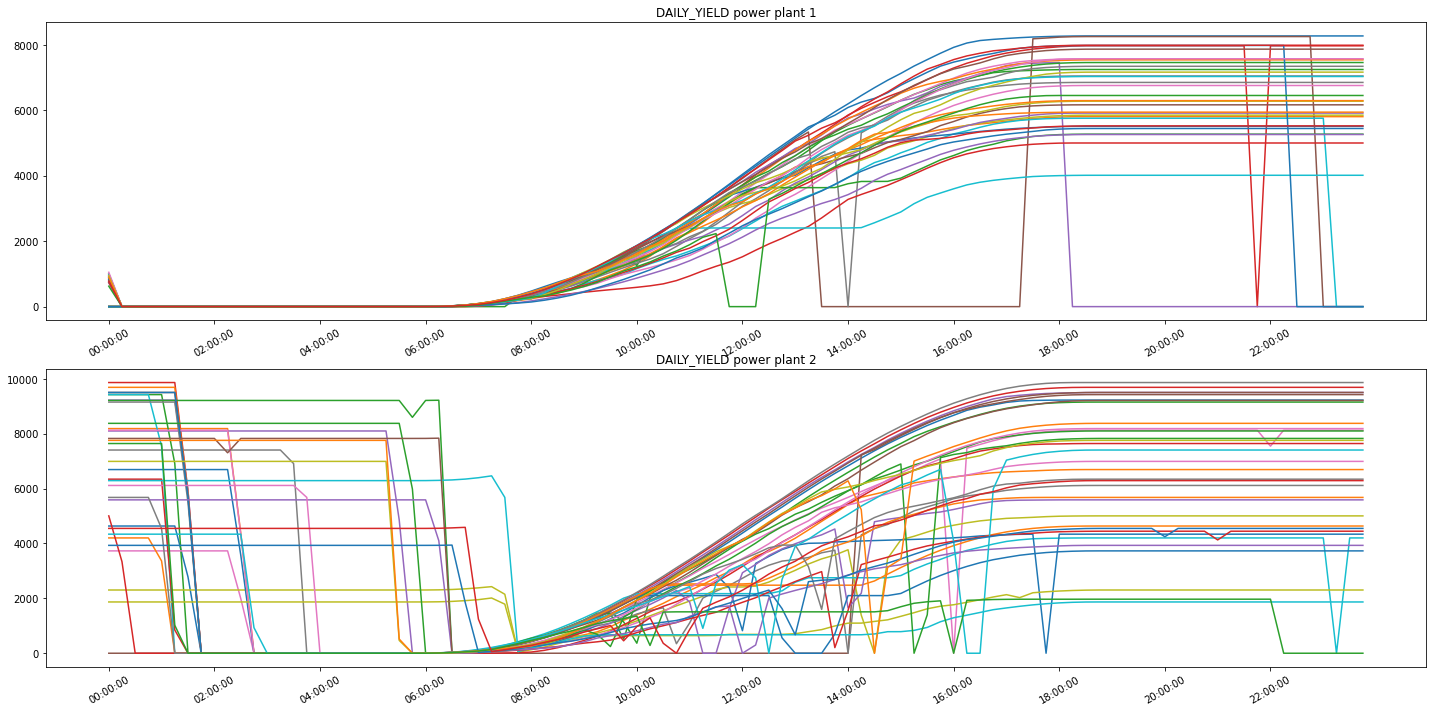

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
for date in set(p1_gen.DATE):
    times = [str(time) for time in sorted(list(set(p1_gen.TIME)))]
    plt.plot(times,p1_gen[(p1_gen.SOURCE_KEY == p1_gen.SOURCE_KEY[0]) & (p1_gen.DATE == date)].DAILY_YIELD)
    plt.xticks(ticks=times[::8],rotation=30)
plt.title("DAILY_YIELD power plant 1")
plt.subplot(2,1,2)
for date in set(p2_gen.DATE):
    times = [str(time) for time in sorted(list(set(p2_gen.TIME)))]
    plt.plot(times,p2_gen[(p2_gen.SOURCE_KEY == p2_gen.SOURCE_KEY[0]) & (p2_gen.DATE == date)].DAILY_YIELD)
    plt.xticks(ticks=times[::8],rotation=30)
plt.tight_layout()
plt.title("DAILY_YIELD power plant 2")
plt.show()

We are going to try to clean up the second plant **DAILY_YIELD** column by using a powerful but slow function __reset_night__ for which we see the results in the following plot. 

In [22]:
#in this piece of code we will clean the gen2 data that present the daily yield of the day before 
#on the night of the day after. This not reguards missing data.  


#NOTE: it will take several time


def reset_night(value, source, dd):
    """
    resets the daily yield of night value
    this function needs the value of the daily yield at 00:00, the source key and the day is referring
    and will reset all the data of the night/morning if it hasn't reset the value of the day before jet
    """
    for ind in p2_gen.TIME.unique()[0:32]: #only morning time
        select = p2_gen.loc[(p2_gen.SOURCE_KEY == source) & (p2_gen.DATE == dd) & (p2_gen.TIME == ind)].DAILY_YIELD
        if select.item() > 480:    #not affecting the real starting of the day (constraint on y=480)
            if (select.item() - value).item() >= 0:  #if some morning data are taken new values are not affected
                p2_gen.loc[(p2_gen.SOURCE_KEY == source) & (p2_gen.DATE == dd) & (p2_gen.TIME == ind), "DAILY_YIELD"] = select - value
            else:    #no negative values
                p2_gen.loc[(p2_gen.SOURCE_KEY == source) & (p2_gen.DATE == dd) & (p2_gen.TIME == ind), "DAILY_YIELD"] = 0.0
            

for source in p2_gen.SOURCE_KEY.unique():  #each source
    for day in p2_gen.DATE.unique():       #each day
        reset_val = p2_gen[(p2_gen.DATE == day) & (p2_gen.TIME == datetime.time(0,0)) & (p2_gen.SOURCE_KEY == source)].DAILY_YIELD
        if reset_val.any() > 0:            #if theres some values greater than 0 at 00:00
            reset_night(reset_val, source, day) 

In [23]:
#fill NAs
p1_gen.loc[p1_gen["DAILY_YIELD"].isna(),"DAILY_YIELD"] = 0
p2_gen.loc[p2_gen["DAILY_YIELD"].isna(),"DAILY_YIELD"] = 0

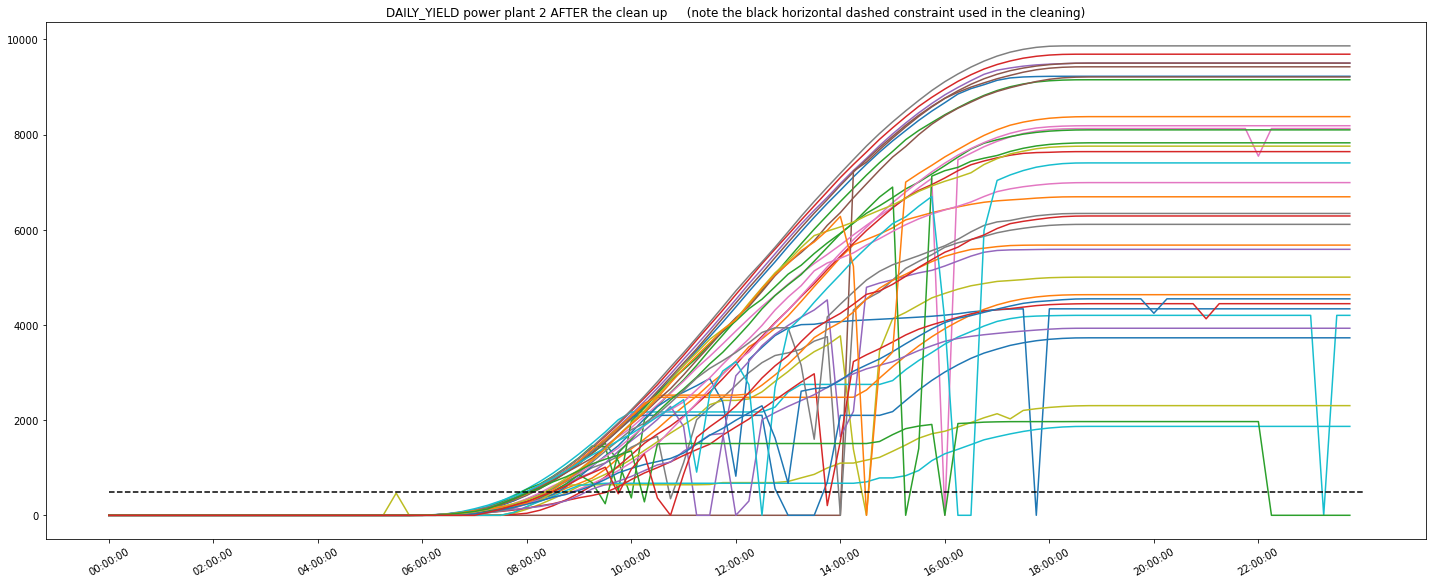

In [24]:
plt.figure(figsize=(20,8))
for date in set(p2_gen.DATE):
    times = [str(time) for time in sorted(list(set(p2_gen.TIME)))]
    plt.plot(times,p2_gen[(p2_gen.SOURCE_KEY == p2_gen.SOURCE_KEY[0]) & (p2_gen.DATE == date)].DAILY_YIELD)
    plt.xticks(ticks=times[::8],rotation=30)
plt.tight_layout()
plt.title("DAILY_YIELD power plant 2 AFTER the clean up     (note the black horizontal dashed constraint used in the cleaning)")
plt.plot([0, 96], [480, 480], "k--")     #horizontal constraint
plt.show()

Another column to clean up is **TOTAL_YIELD**. We in fact know that the **TOTAL_YIELD** column should be in principle a non-decreasing sequence of values for a specific source. We can in this case easily replace missing values and wrong observations in an appropriate way (picking the last correct observation before it). This will allow us to obtain increasing sequences; we can later on extrapolate daily variations of the yield obtained, subtracting day by day the value at midnight to the value of the previous midnight. We could obtain the same result by picking the maximum **DAILY_YIELD** for a specific day.

We'll begin by setting the missing total_yields with zeros: this will allow the function we're going to implement to handle them as integers:

In [25]:
p1_gen.loc[p1_gen["TOTAL_YIELD"].isna(),"TOTAL_YIELD"] = 0
p2_gen.loc[p2_gen["TOTAL_YIELD"].isna(),"TOTAL_YIELD"] = 0

To give an example why we need to transform the data we have : at the moment the total yield for a specific inverter isn't always a non-decreasing sequence as expected as shown by the figure below.

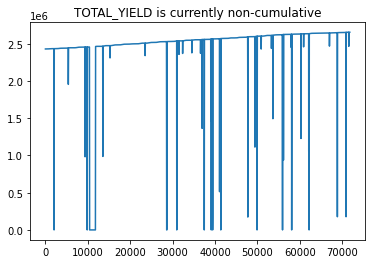

In [26]:
p2_gen[p2_gen.SOURCE_KEY == "s0_gen2"].TOTAL_YIELD.plot()
plt.title("TOTAL_YIELD is currently non-cumulative")
plt.show()

We implement a function to fix this for all sources for a given dataframe:

In [27]:
def correct_cumulative_total_yields(df):
    '''Converts the TOTAL_YIELD column of a dataframe to obtain appropriate non-decreasing sequences of values for all sources.
    
    Args:
        df (pd.DataFrame): the dataframe to modify
    
    
    Returns:
        None
    '''
    for source in df.SOURCE_KEY.unique():
        previous_total_yields = df[df.SOURCE_KEY == source].TOTAL_YIELD 
        prev_max = previous_total_yields[previous_total_yields!=0].iloc[0] # the condition != 0 is necessary as in some cases the first data entry was added hence total yields is 0
        new_total_yields = []
        for i in range(len(previous_total_yields)):
            current_yield = previous_total_yields.iloc[i] 
            if current_yield >= prev_max: 
                prev_max = current_yield 
                new_total_yields.append(current_yield)
            else:
                new_total_yields.append(prev_max) # this replaces values that are below the previous total yield (0 or wrong) with the previous maximum, obtaining a non-decreasing seq.
        df.loc[df.SOURCE_KEY == source,"TOTAL_YIELD"] = new_total_yields

In [28]:
correct_cumulative_total_yields(p1_gen)
correct_cumulative_total_yields(p2_gen)

Now all the total yields for a specific inverter are non-decreasing sequences, as shown by the 2 figures below:

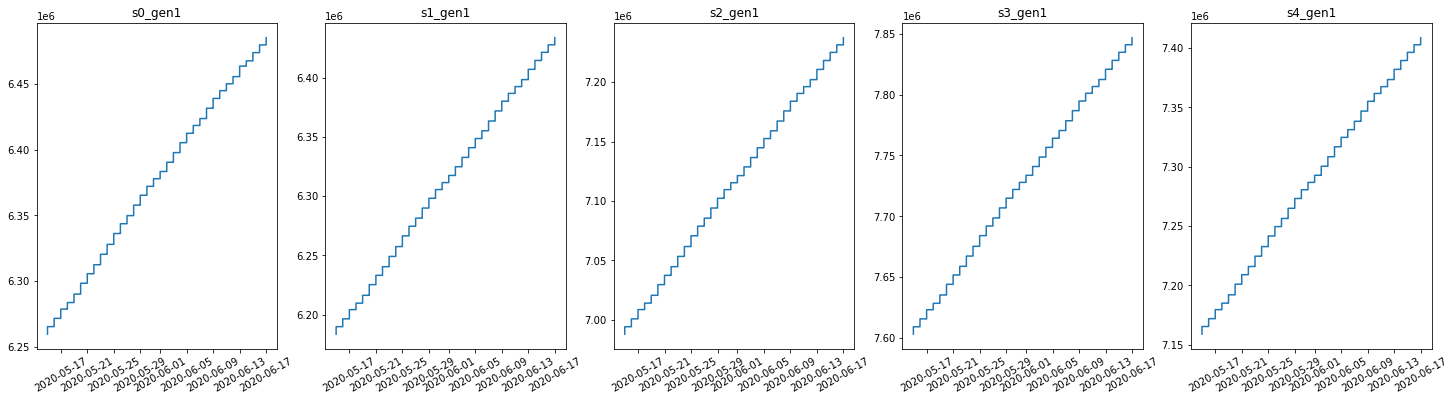

In [29]:
sources_plant_1 = list(inverters_ids_1.values())
plt.figure(figsize=(25,6))
for i in range(5):
    source = sources_plant_1[i]
    plt.subplot(1,5,i+1)
    plt.plot(p1_gen[p1_gen.SOURCE_KEY == source].DATE,p1_gen[p1_gen.SOURCE_KEY == source].TOTAL_YIELD)
    plt.title(source)
    plt.xticks(rotation=30)
plt.show()

# just a sample of all the inverters of the first plant is shown here

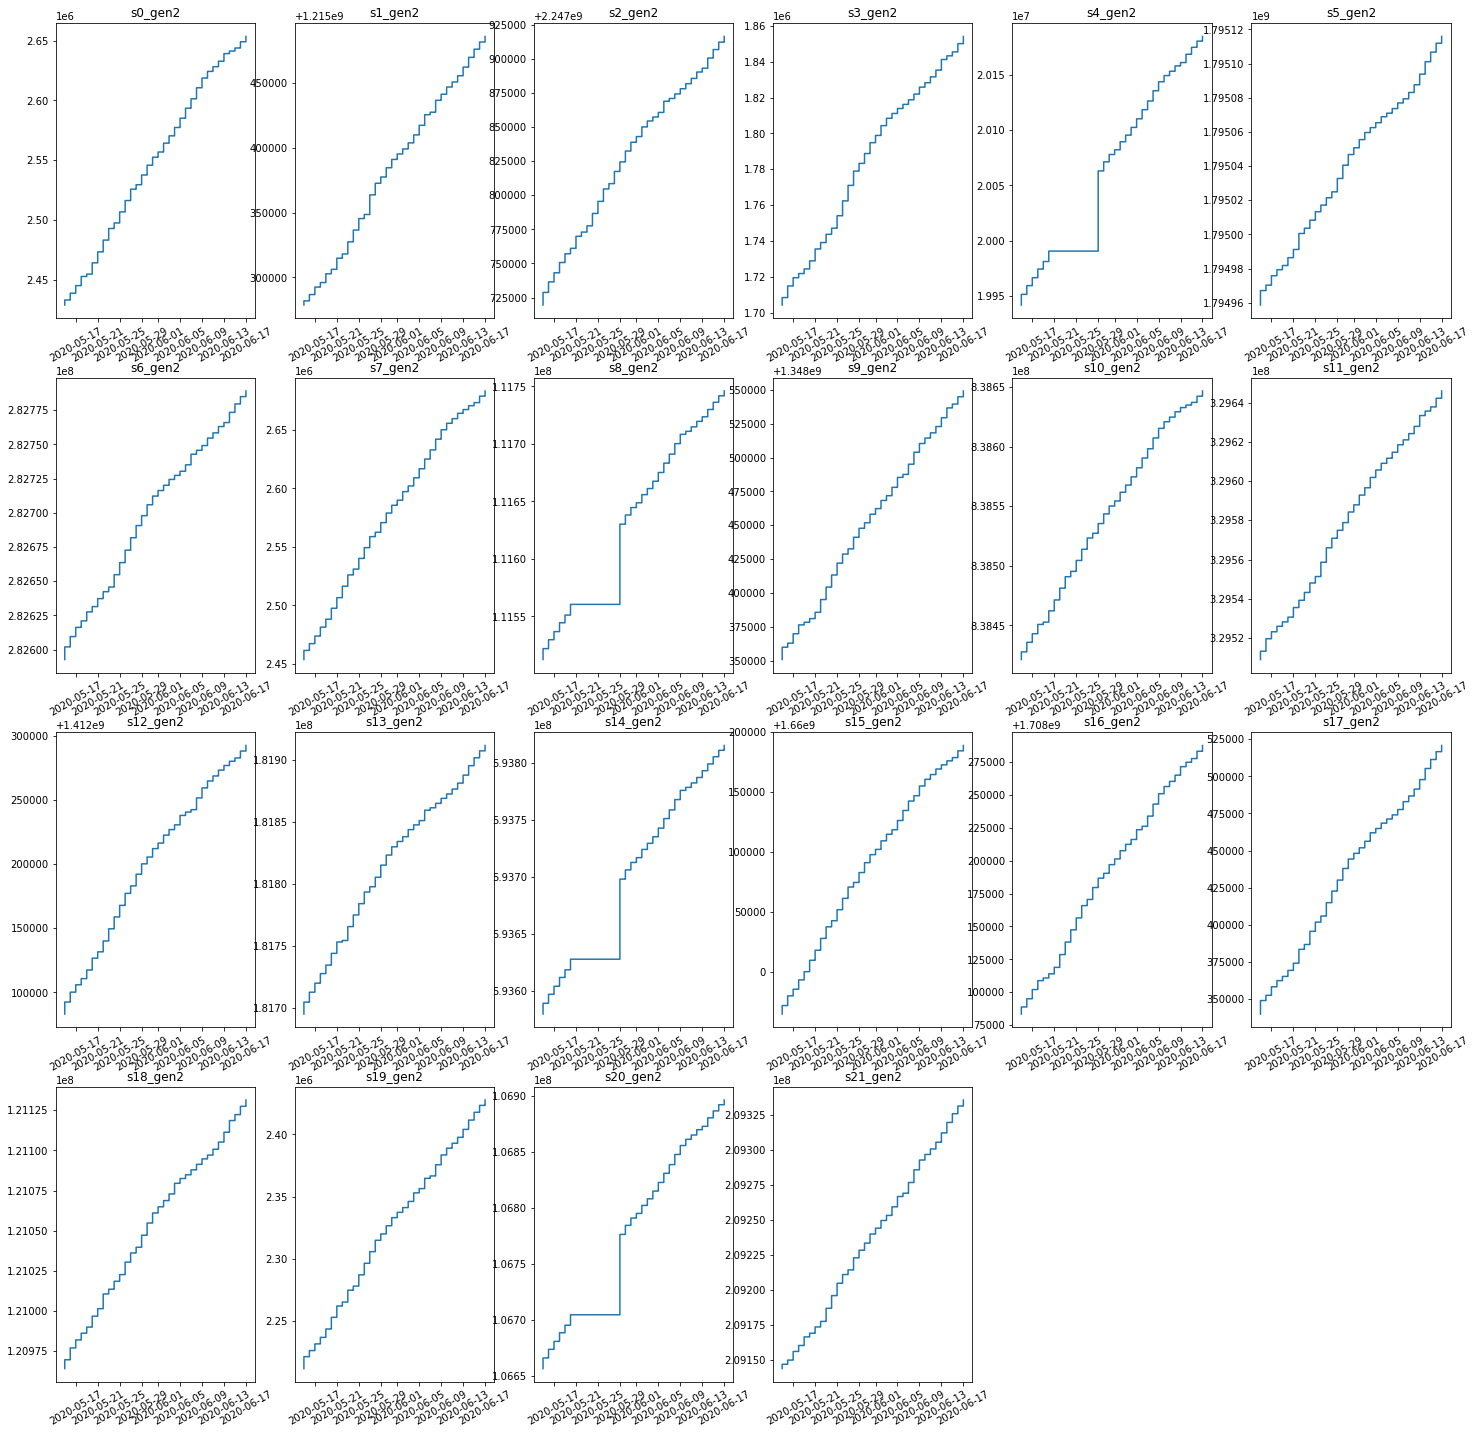

In [30]:
sources_plant_2 = list(inverters_ids_2.values())
plt.figure(figsize=(25,25))
for i in range(len(sources_plant_2)):
    source = sources_plant_2[i]
    plt.subplot(4,6,i+1)
    plt.plot(p2_gen[p2_gen.SOURCE_KEY == source].DATE,p2_gen[p2_gen.SOURCE_KEY == source].TOTAL_YIELD)
    plt.title(source)
    plt.xticks(rotation=30)
plt.show()

While for the first plants there are no problems, we can observe that for 4 inverters in the second plant we're missing data for the days between the 21st of may and the 28th of may. The jump in total yield for all these cases seems to indicate that the production of energy didn't stop in this period, but simply data wasn't gathered.

Instead of having such a huge gap in the total yield for these inverters we can distribute the gain in yield equally across the days in which data is missing. For semplicity we'll assume that all the yield for those days is gathered at 16:00.

In [31]:
missing_data_inverters = ["s4_gen2","s8_gen2","s14_gen2","s20_gen2"]

In [32]:
def split_total_yield_gain(df,inverter):
    '''Sets the total yield of a specific hour of the days where data is missing by splitting the gap yield equally'''
    initial_value = df[(df.SOURCE_KEY == inverter) & (df.DATE == datetime.date(2020,5,20))].TOTAL_YIELD.max() #total yield before the gap
    final_value = df[(df.SOURCE_KEY == inverter) & (df.DATE == datetime.date(2020,5,29))].TOTAL_YIELD.max() #total yield after the gap
    diff = final_value - initial_value # gap yield
    diff_per_day = diff/9.0 # we distribute the gap yield equally
    days = [datetime.date(2020,5,21),datetime.date(2020,5,22),datetime.date(2020,5,23),datetime.date(2020,5,24),
            datetime.date(2020,5,25),datetime.date(2020,5,26),datetime.date(2020,5,27),datetime.date(2020,5,28)]
    for i in range(len(days)):
        df.loc[(df.SOURCE_KEY == inverter)&(df.DATE == days[i])&(df.TIME == datetime.time(16,0)),"TOTAL_YIELD"] = initial_value + diff_per_day*(i+1)

In [33]:
for inverter in missing_data_inverters:
    split_total_yield_gain(p2_gen,inverter)

In [34]:
## right now this is the result of the previous function

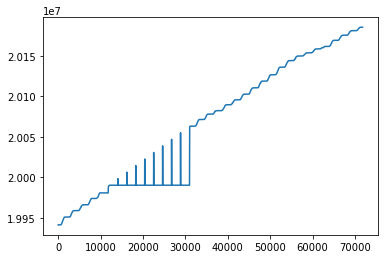

In [35]:
p2_gen[(p2_gen.SOURCE_KEY == "s4_gen2")].TOTAL_YIELD.plot()

In [36]:
# to obtain the step function wanted all we need to do now is call again the function to obtain a correct cumulative yield

In [37]:
correct_cumulative_total_yields(p2_gen)

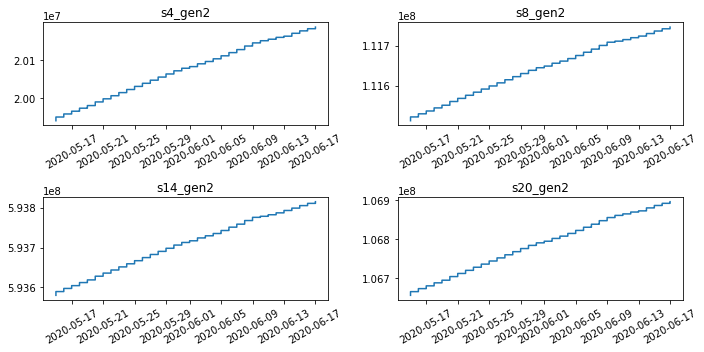

In [38]:
# the total yields for the inverters which were missing data are now fixed in a reasonable way, as shown below

plt.figure(figsize=(10,5))
for i in range(len(missing_data_inverters)):
    inverter = missing_data_inverters[i]
    source = sources_plant_2[i]
    plt.subplot(2,2,i+1)
    plt.plot(p2_gen[p2_gen.SOURCE_KEY == inverter].DATE,p2_gen[p2_gen.SOURCE_KEY == inverter].TOTAL_YIELD)
    plt.title(inverter)
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Finally, we're going to order the columns in a different way:

In [39]:
p1_gen = p1_gen.reindex(columns=['DATE_TIME', 'DATE', 'TIME', 'MISS_VAL', 'PLANT_ID', 'SOURCE_KEY',
                                 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'])
p2_gen = p2_gen.reindex(columns=['DATE_TIME', 'DATE', 'TIME', 'MISS_VAL', 'PLANT_ID', 'SOURCE_KEY',
                                 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'])

Recap:

In [40]:
p1_gen.head()

,DATE_TIME,DATE,TIME,MISS_VAL,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,2020-05-15,00:00:00,0,4135001.0,s0_gen1,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,2020-05-15,00:00:00,0,4135001.0,s1_gen1,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,2020-05-15,00:00:00,0,4135001.0,s2_gen1,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,2020-05-15,00:00:00,0,4135001.0,s3_gen1,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,2020-05-15,00:00:00,0,4135001.0,s4_gen1,0.0,0.0,0.0,7158964.0


####################

Data entries are missing for the sensors' dataframes too, we're going to add them aswell:

In [41]:
init = datetime.datetime(year = 2020, month = 5, day = 15, hour = 0, minute = 0, second = 0)
finit = datetime.datetime(year = 2020, month = 6, day = 18, hour = 0, minute = 0, second = 0)
new_DATE_TIME = np.arange(init, finit, datetime.timedelta(minutes = 15)).astype(datetime.datetime)
new_DATE_TIME = pd.DataFrame(new_DATE_TIME,columns = ['DATE_TIME'])
p1_wea["DATE_TIME"] = p1_wea["DATE_TIME"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
p2_wea["DATE_TIME"] = p2_wea["DATE_TIME"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
p1_wea = pd.merge(p1_wea, new_DATE_TIME, on = 'DATE_TIME', how = 'right')
p2_wea = pd.merge(p2_wea, new_DATE_TIME, on = 'DATE_TIME', how = 'right')

As we did for the inverters' dataframe we're going to to split **DATE_TIME** into **DATE** and **TIME** and sort by them:

In [42]:
p1_wea["DATE"] = p1_wea["DATE_TIME"].apply(lambda x: x.date())
p2_wea["DATE"] = p2_wea["DATE_TIME"].apply(lambda x: x.date())

p1_wea["TIME"] = p1_wea["DATE_TIME"].apply(lambda x: x.time())
p2_wea["TIME"] = p2_wea["DATE_TIME"].apply(lambda x: x.time())

p1_wea["DATE_TIME"] = p1_wea["DATE_TIME"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
p2_wea["DATE_TIME"] = p2_wea["DATE_TIME"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))

p1_wea = p1_wea.sort_values(["DATE", "TIME"]).reset_index(drop=True)
p2_wea = p2_wea.sort_values(["DATE", "TIME"]).reset_index(drop=True)

In [43]:
p1_wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3264 non-null   object 
 1   PLANT_ID             3182 non-null   float64
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
 6   DATE                 3264 non-null   object 
 7   TIME                 3264 non-null   object 
dtypes: float64(4), object(4)
memory usage: 204.1+ KB


In [44]:
p2_wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3264 non-null   object 
 1   PLANT_ID             3259 non-null   float64
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
 6   DATE                 3264 non-null   object 
 7   TIME                 3264 non-null   object 
dtypes: float64(4), object(4)
memory usage: 204.1+ KB


Adding missing basic informations for the new data entries and a new column to denote if the entry was missing or not:

In [45]:
p1_wea.loc[p1_wea['PLANT_ID'].isna() == True, 'PLANT_ID'] = 4135001.0
p2_wea.loc[p2_wea['PLANT_ID'].isna() == True, 'PLANT_ID'] = 4136001.0

p1_wea["MISS_VAL"] = np.where(p1_wea["AMBIENT_TEMPERATURE"].isna(),1,0)
p2_wea["MISS_VAL"] = np.where(p2_wea["AMBIENT_TEMPERATURE"].isna(),1,0)

p1_wea.loc[p1_wea['AMBIENT_TEMPERATURE'].isna() == True, 'SOURCE_KEY'] = 'HmiyD2TTLFNqkNe'
p2_wea.loc[p2_wea['AMBIENT_TEMPERATURE'].isna() == True, 'SOURCE_KEY'] = 'iq8k7ZNt4Mwm3w0'

The **IRRADIATION** column is a measure how much solar exposure there has been in the latest 15 minutes timeframe. As shown by the example figure below, it's not a cumulative variable.

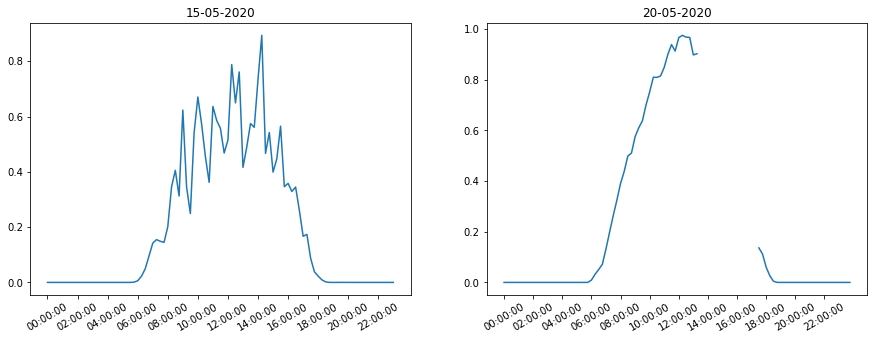

In [46]:
times = [str(time) for time in sorted(list(set(p1_wea.TIME)))]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(times,p1_wea[p1_wea.DATE == datetime.date(2020,5,15)].IRRADIATION)
plt.title("15-05-2020")
plt.xticks(ticks = times[::8],rotation=30)
plt.subplot(1,2,2)
plt.plot(times,p1_wea[p1_wea.DATE == datetime.date(2020,5,20)].IRRADIATION)
plt.title("20-05-2020")
plt.xticks(ticks=times[::8],rotation=30)
plt.show()

From the second graph of the figure above we can see that irradiation data sometimes is missing. We'll use pandas interpolate function with an order two polynomial in order to fill this kind of data. The same will be done for AMBIENT_TEMPERATURE in the following code.

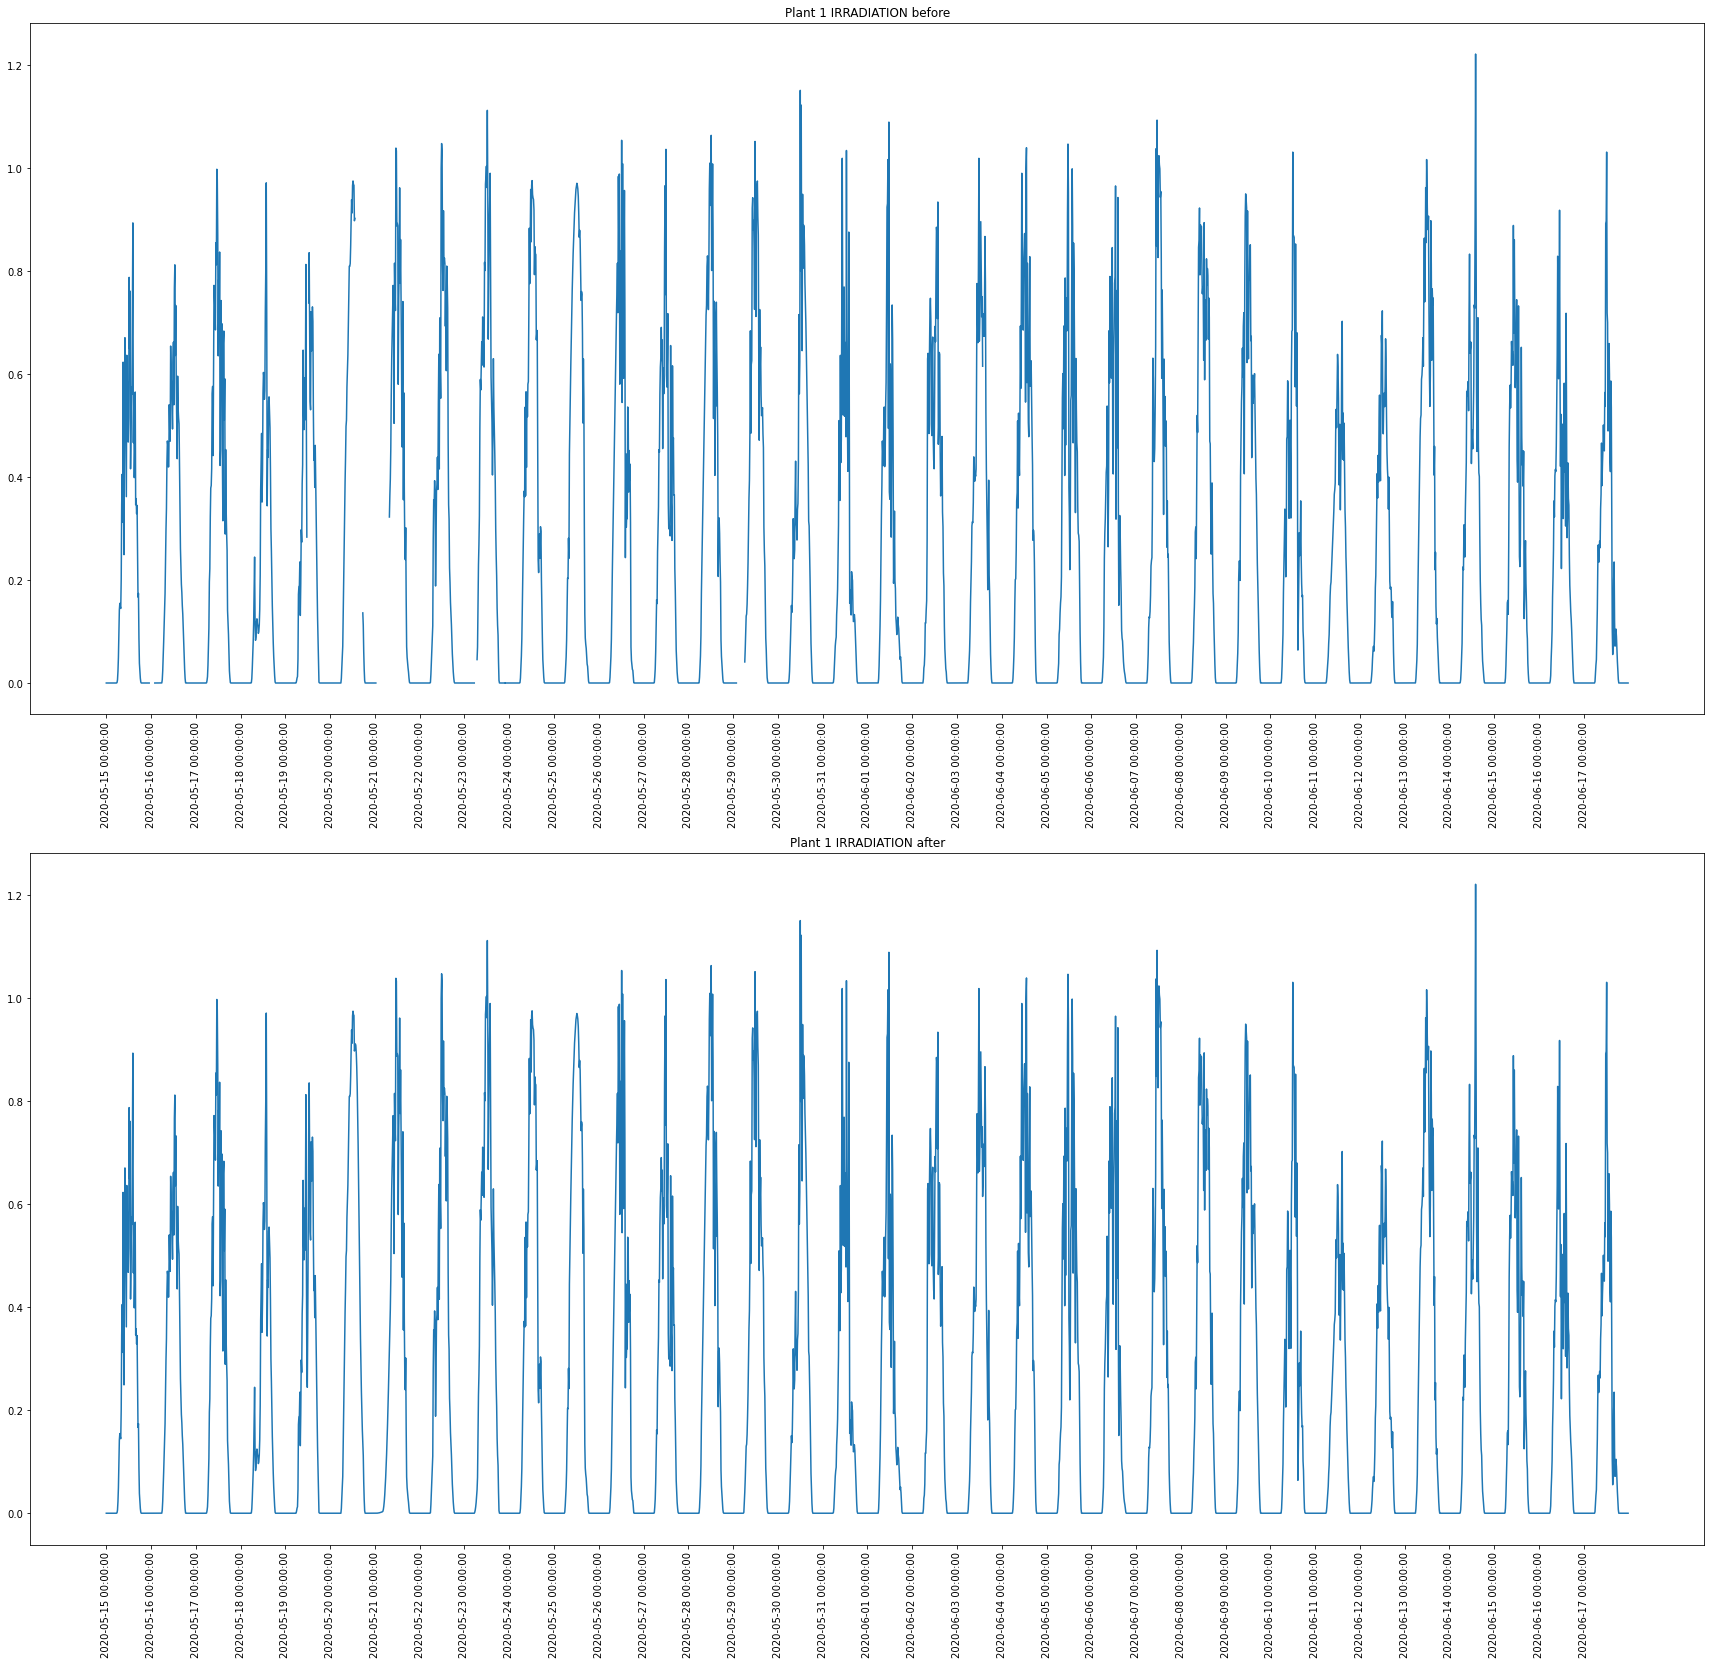

In [47]:
days = [day for day in sorted(list(set(p1_wea.DATE_TIME[p1_wea.TIME == datetime.time(0,0)])))]

plt.figure(figsize=(30, 28))
plt.subplot(2,1,1)
plt.title("Plant 1 IRRADIATION before")
plt.xticks(range(0,len(p1_wea),int(len(p1_wea)/len(days))),days,rotation=90)
plt.plot(p1_wea.IRRADIATION)

p1_wea.IRRADIATION.interpolate("polynomial", order = 2, inplace=True)
#irradiation is greater or equal to zero
p1_wea.loc[p1_wea.IRRADIATION < 0.0, 'IRRADIATION'] = 0.0

plt.subplot(2,1,2)
plt.title("Plant 1 IRRADIATION after")
plt.xticks(range(0,len(p1_wea),int(len(p1_wea)/len(days))),days,rotation=90)
plt.plot(p1_wea.IRRADIATION)

In [48]:
#second plant IRRADIATION
#plt.figure(figsize=(30, 28))
#plt.subplot(2,1,1)
#plt.title("Plant 2 IRRADIATION before")
#plt.xticks(range(0,len(p1_wea),int(len(p1_wea)/len(days))),days,rotation=90)
#plt.plot(p2_wea.IRRADIATION)

p2_wea.IRRADIATION.interpolate("polynomial", order = 2, inplace=True)
#irradiation is greater or equal to zero
p2_wea.loc[p2_wea.IRRADIATION < 0.0, 'IRRADIATION'] = 0.0

#plt.subplot(2,1,2)
#plt.title("Plant 2 IRRADIATION after")
#plt.xticks(range(0,len(p1_wea),int(len(p1_wea)/len(days))),days,rotation=90)
#plt.plot(p2_wea.IRRADIATION)

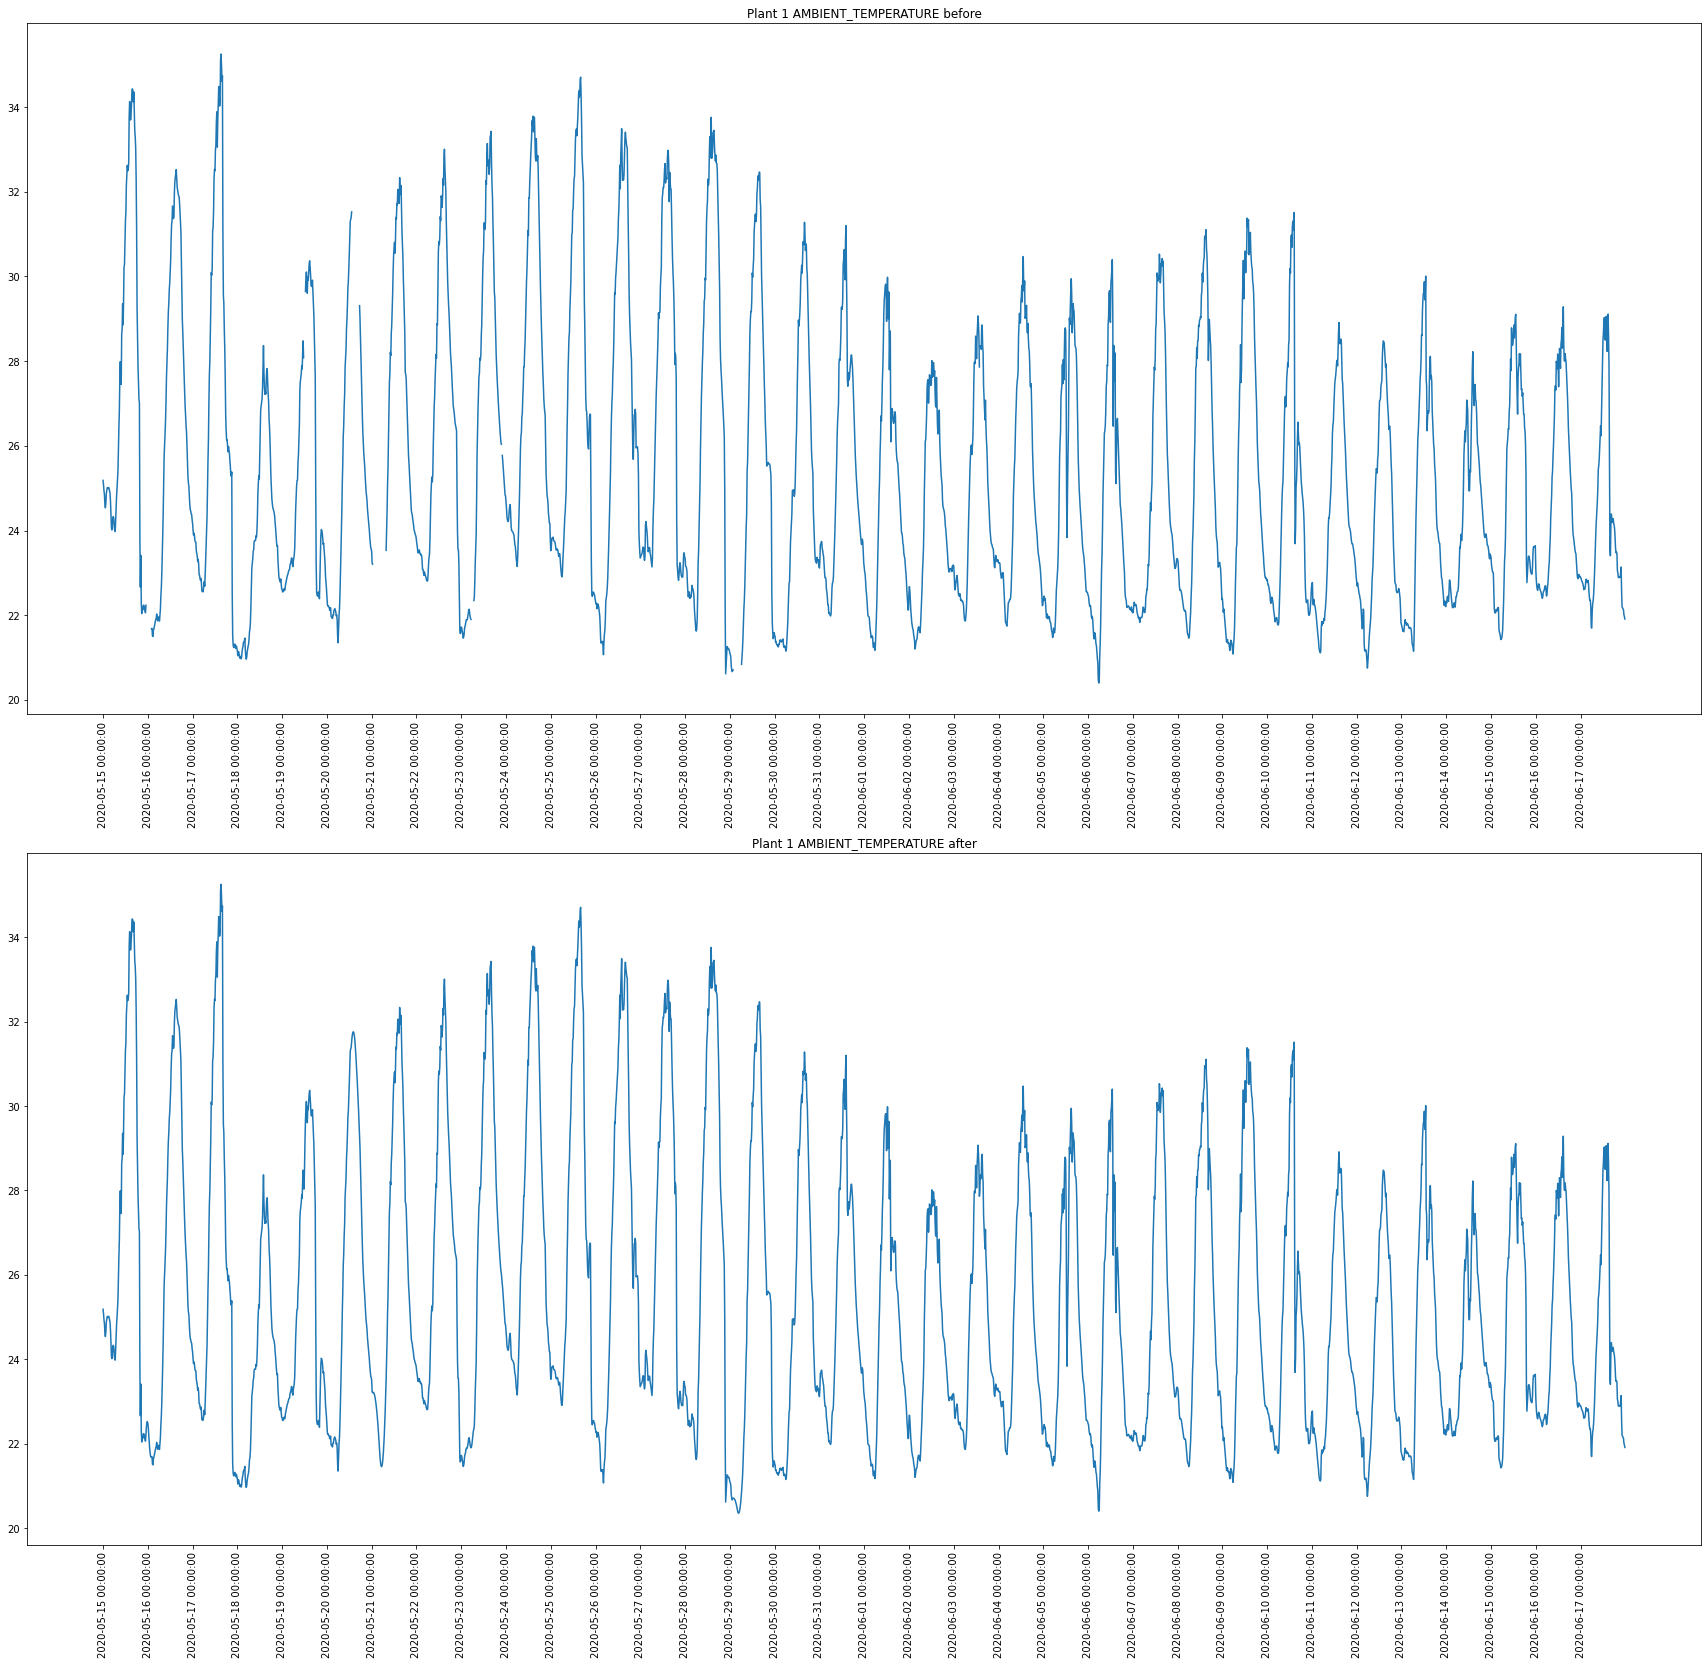

In [49]:
plt.figure(figsize=(30, 28))
plt.subplot(2,1,1)
plt.title("Plant 1 AMBIENT_TEMPERATURE before")
plt.xticks(range(0,len(p1_wea),int(len(p1_wea)/len(days))),days,rotation=90)
plt.plot(p1_wea.AMBIENT_TEMPERATURE)

p1_wea.AMBIENT_TEMPERATURE.interpolate("polynomial", order = 2, inplace=True)

plt.subplot(2,1,2)
plt.title("Plant 1 AMBIENT_TEMPERATURE after")
plt.xticks(range(0,len(p1_wea),int(len(p1_wea)/len(days))),days,rotation=90)
plt.plot(p1_wea.AMBIENT_TEMPERATURE)

In [50]:
#second plant AMBIENT TEMPERATURE
#plt.figure(figsize=(30, 28))
#plt.subplot(2,1,1)
#plt.title("Plant 2 AMBIENT_TEMPERATURE before")
#plt.xticks(range(0,len(p1_wea),int(len(p1_wea)/len(days))),days,rotation=90)
#plt.plot(p2_wea.AMBIENT_TEMPERATURE)

p2_wea.AMBIENT_TEMPERATURE.interpolate("polynomial", order = 2, inplace=True)

#plt.subplot(2,1,2)
#plt.title("Plant 2 AMBIENT_TEMPERATURE after")
#plt.xticks(range(0,len(p1_wea),int(len(p1_wea)/len(days))),days,rotation=90)
#plt.plot(p2_wea.AMBIENT_TEMPERATURE)

In [51]:
#fill last NAs
p1_wea.MODULE_TEMPERATURE.interpolate("polynomial", order = 2, inplace=True)
p2_wea.MODULE_TEMPERATURE.interpolate("polynomial", order = 2, inplace=True)

Finally, we're going to order the columns in a different way:

In [52]:
p1_wea = p1_wea.reindex(columns=['DATE_TIME', 'DATE', 'TIME', 'MISS_VAL', 'PLANT_ID', 'SOURCE_KEY',
                                 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'])
p2_wea = p2_wea.reindex(columns=['DATE_TIME', 'DATE', 'TIME', 'MISS_VAL', 'PLANT_ID', 'SOURCE_KEY', 
                                 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'])

Recap:

In [53]:
p1_wea.head()

,DATE_TIME,DATE,TIME,MISS_VAL,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,2020-05-15,00:00:00,0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,2020-05-15,00:15:00,0,4135001.0,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,2020-05-15,00:30:00,0,4135001.0,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,2020-05-15,00:45:00,0,4135001.0,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,2020-05-15,01:00:00,0,4135001.0,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


To save the new data: (if needed)

In [54]:
p1_gen.to_csv('./NEW_Plant_1_Generation_Data.csv', header = True, index = False)
p1_wea.to_csv('./NEW_Plant_1_Weather_Sensor_Data.csv', header = True, index = False)
p2_gen.to_csv('./NEW_Plant_2_Generation_Data.csv', header = True, index = False)
p2_wea.to_csv('./NEW_Plant_2_Weather_Sensor_Data.csv', header = True, index = False)

A small final note is that we have decided to fill missing data in different ways, as we thought it was best. This can be useful for the next analysis and in this particular case we decided that dropping datas with NAs was not a good choice. The important thing to note is that, even if we filled missing values, we created a column that say if the particular value was missing or not. This can be important in certain analysis as in retreating the datas after some time.  

# Analysis

We're going to answer to some questions in order to better understand our data

<h5>1) What is the mean daily yield?</h5>

We're going to calculate:
- the average daily yield for a single specific inverter
- the average daily yield for the inverters in a plant
- the average daily yield per inverter considering both plants
- the mean total daily yield considering all inverters

<h5>1.1) Average daily yield for a single inverter </h5>

We've seen the daily yield column should be resetting at midnight but sometimes doesn't. Even though it was mostly fixed, it seems more secure to calculate the daily yields of an inverter by subtracting the total yield at the end of a day to the one at the beginning of the day.

In [55]:
# we group by day and inverter to find the daily production of each inverter

p1_daily_yields = p1_gen.groupby(["DATE","SOURCE_KEY"]).TOTAL_YIELD.apply(lambda x: max(x)-min(x)).reset_index()

In [56]:
p1_daily_yields.head()

,DATE,SOURCE_KEY,TOTAL_YIELD
0,2020-05-15,s0_gen1,5754.0
1,2020-05-15,s10_gen1,6383.0
2,2020-05-15,s11_gen1,5707.0
3,2020-05-15,s12_gen1,6418.0
4,2020-05-15,s13_gen1,6176.0


In [57]:
# now in order to find the mean daily yield for each inverter all we need to do is group by inverter again
#   and average out its daily yields:

p1_dy_means = p1_daily_yields.groupby(["SOURCE_KEY"]).TOTAL_YIELD.mean().reset_index()

In [58]:
p1_dy_means

,SOURCE_KEY,TOTAL_YIELD
0,s0_gen1,6640.000000
1,s10_gen1,7445.676471
2,s11_gen1,6535.470588
3,s12_gen1,7302.088235
4,s13_gen1,7086.617647
5,s14_gen1,7244.941176
6,s15_gen1,7217.764706
7,s16_gen1,7201.441176
8,s17_gen1,7303.558824
9,s18_gen1,7235.382353


In [59]:
# we do exactly the same for the inverters of the second plant

p2_daily_yields = p2_gen.groupby(["DATE","SOURCE_KEY"]).TOTAL_YIELD.apply(lambda x: max(x)-min(x)).reset_index()
p2_dy_means = p2_daily_yields.groupby(["SOURCE_KEY"]).TOTAL_YIELD.mean().reset_index()
p2_dy_means

,SOURCE_KEY,TOTAL_YIELD
0,s0_gen2,6602.470588
1,s10_gen2,6626.441176
2,s11_gen2,4023.323529
3,s12_gen2,6158.705882
4,s13_gen2,6372.264706
5,s14_gen2,6911.352941
6,s15_gen2,6583.588235
7,s16_gen2,6011.058824
8,s17_gen2,5318.676471
9,s18_gen2,4919.058824


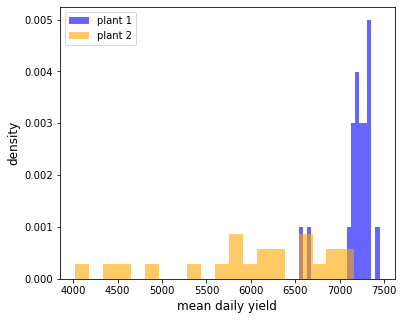

In [60]:
# we can plot the distribution of the mean daily yields

plt.figure(figsize=(6,5))
plt.hist(p1_dy_means.TOTAL_YIELD,density=True,bins=20,color="blue",alpha=0.6,label="plant 1")
plt.hist(p2_dy_means.TOTAL_YIELD,density=True,bins=20,color="orange",alpha=0.6,label="plant 2")
plt.xlabel("mean daily yield",fontsize=12)
plt.ylabel("density",fontsize=12)
plt.legend()
plt.show()

<h5>1.2 & 1.3 Average daily yield for the inverters in a plant & average daily yield per inverter considering both plants</h5>

In [61]:
p1_dy_inv_mean = p1_dy_means.TOTAL_YIELD.mean()
p2_dy_inv_mean = p2_dy_means.TOTAL_YIELD.mean()
mean_dy_per_inv = (p1_dy_inv_mean+p2_dy_inv_mean)/2

print(f"Mean yield per inverter in plant 1: {round(p1_dy_inv_mean,2)}kW/day")
print(f"Mean yield per inverter in plant 2: {round(p2_dy_inv_mean,2)}kW/day")
print(f"Mean yield per inverter: {round(mean_dy_per_inv,2)}kW/day")

Mean yield per inverter in plant 1: 7194.0kW/day
Mean yield per inverter in plant 2: 5994.24kW/day
Mean yield per inverter: 6594.12kW/day


<h5>1.4 Mean total daily yield</h5>

In [62]:
# we consider all daily yields per inverter

daily_yields = pd.concat([p1_daily_yields,p2_daily_yields])

In [63]:
daily_yields.head()

,DATE,SOURCE_KEY,TOTAL_YIELD
0,2020-05-15,s0_gen1,5754.0
1,2020-05-15,s10_gen1,6383.0
2,2020-05-15,s11_gen1,5707.0
3,2020-05-15,s12_gen1,6418.0
4,2020-05-15,s13_gen1,6176.0


In [64]:
# and group them by day, obtaining the total yield for each day

total_yield_per_day = daily_yields.groupby("DATE").TOTAL_YIELD.sum().reset_index()

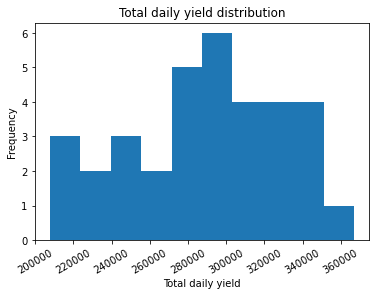

In [65]:
# we can plot the distribution of the total daily yields

plt.hist(total_yield_per_day.TOTAL_YIELD)
plt.xticks(rotation=30)
plt.xlabel("Total daily yield")
plt.ylabel("Frequency")
plt.title("Total daily yield distribution")
plt.show()

In [66]:
# and finally calculate the mean total daily yield

mean_daily_yield = total_yield_per_day.TOTAL_YIELD.mean()
print(f"Mean total daily yield: {round(mean_daily_yield,2)}kW/day")

Mean total daily yield: 290141.29kW/day


<h5>2.1 What is the total irradiation per day?</h5>

As we've seen before the irradiation variable isn't cumulative, and in the case of missing data, a polynomial was used to to interpolate missing parts of daily curves

Since it isn't cumulative we can group everything by day and simply sum up all the values of irradiation for all the sensors:

In [67]:
sensors = pd.concat([p1_wea,p2_wea])

In [68]:
irr_per_day_df = sensors.IRRADIATION.groupby(sensors.DATE).sum().reset_index()

In [69]:
# the following is a table with the total irradiation for each day

irr_per_day_df

,DATE,IRRADIATION
0,2020-05-15,47.596065
1,2020-05-16,42.328263
2,2020-05-17,44.164973
3,2020-05-18,36.762265
4,2020-05-19,39.601867
5,2020-05-20,54.225731
6,2020-05-21,52.207617
7,2020-05-22,50.654966
8,2020-05-23,54.339122
9,2020-05-24,52.363225


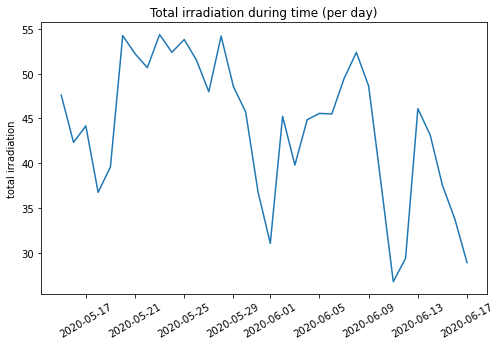

In [70]:
plt.figure(figsize=(8,5))
plt.title("Total irradiation during time (per day)")
plt.plot(irr_per_day_df.DATE,irr_per_day_df.IRRADIATION)
plt.ylabel("total irradiation")
plt.xticks(rotation=30)
plt.show()

<h5>2.2 How does the irradiation correlate to the total daily yield?</h5>

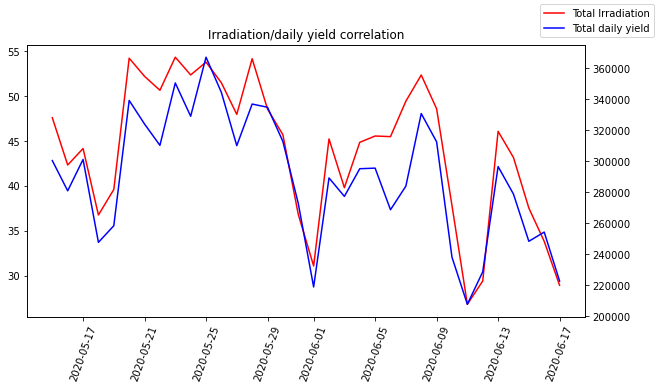

In [71]:
fig,ax = plt.subplots(figsize=(10,5))
plt.title("Irradiation/daily yield correlation")
plt.xticks(rotation=70)
ax.plot(irr_per_day_df.DATE,irr_per_day_df.IRRADIATION,color="red")
ax2 = ax.twinx()
ax2.plot(total_yield_per_day.DATE,total_yield_per_day.TOTAL_YIELD,color="blue")
fig.legend(["Total Irradiation","Total daily yield"])
plt.show()

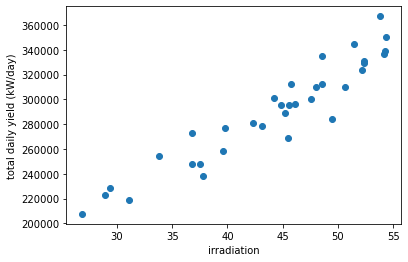

In [72]:
## clearly there's a strong correlation between the two variables, this can also be seen plotting a scatter plot:
plt.scatter(irr_per_day_df.IRRADIATION,total_yield_per_day.TOTAL_YIELD)
plt.xlabel("irradiation")
plt.ylabel("total daily yield (kW/day)")
plt.show()

This could be used to create a model that predicts the daily yield given irradation..

<h5>3) What is the max ambient and module temperature?</h5>

In [73]:
ambient_temp = sensors.AMBIENT_TEMPERATURE.max()
print("Max ambient temperature:",round(ambient_temp,2))
module_temp = sensors.MODULE_TEMPERATURE.max()
print("Max module temperature:",round(module_temp,2))

Max ambient temperature: 39.18
Max module temperature: 66.64


<h5>4) How many inverters are there for each plant?¶</h5>

In [74]:
plant1_inverters = len(p1_gen.SOURCE_KEY.unique())
plant2_inverters = len(p2_gen.SOURCE_KEY.unique())

print(f"There are {plant1_inverters} inverters in plant 1.")
print(f"There are {plant2_inverters} inverters in plant 2.")

There are 22 inverters in plant 1.
There are 22 inverters in plant 2.


<h5>5) What is the maximum/minimum amount of DC/AC Power generated in a day?</h5>

Just like it was for the irradiation, DC and AC power aren't cumulative measures through the day (as it was shown during data preparation)

Knowing this, we can sum them up considering all inverters through the day. This way we obtain two dataframes reporting the totals per day.

In [75]:
inverters = pd.concat([p1_gen,p2_gen])

In [76]:
dc_power_per_day = inverters.groupby(inverters.DATE).DC_POWER.sum().reset_index()
ac_power_per_day = inverters.groupby(inverters.DATE).AC_POWER.sum().reset_index()

In [77]:
print(f"Maximum DC POWER per day: {round(max(dc_power_per_day.DC_POWER),2)}")
print(f"Minimum DC POWER per day: {round(min(dc_power_per_day.DC_POWER),2)}")
print(f"Maximum AC POWER per day: {round(max(ac_power_per_day.AC_POWER),2)}")
print(f"Minimum AC POWER per day: {round(min(ac_power_per_day.AC_POWER),2)}")

Maximum DC POWER per day: 8481752.45
Minimum DC POWER per day: 5343322.21
Maximum AC POWER per day: 1341152.42
Minimum AC POWER per day: 830022.68


#### Ranking

In the following section will be performed the calculation for obtaining a ranking of the various panels. There will be two rankings at the end. The first is the general one, the second does not count the data signed as missing values in the calculations, so is a little different. The general result is that the first plant of panels seems to be better than the second in the production of energy for the period in which data were collected.

Ranking is performed on AC/DC production over the days in mean and taking the mean of the maximums. 

In [78]:
def create_summit(data1):
    """
    this function returns a dataframe of key values for each source key in data1
    """
    uniq = data1.SOURCE_KEY.unique()
    tab1 = pd.DataFrame()
    source_keys = []
    dc_mean = []
    dc_max = []
    ac_mean = []
    ac_max = []
    
    for sou_key in uniq:
        panel = data1[data1.SOURCE_KEY == sou_key]
        source_keys.append(sou_key)
        dc_mean.append(panel.groupby("DATE").DC_POWER.mean().mean())
        dc_max.append(panel.groupby("DATE").DC_POWER.max().mean())
        ac_mean.append(panel.groupby("DATE").AC_POWER.mean().mean())
        ac_max.append(panel.groupby("DATE").AC_POWER.max().mean())
         
    tab1["SOURCE_KEY"] = np.array(source_keys)
    tab1["DC_MEAN"] = np.array(dc_mean)
    tab1["DC_MAX"] = np.array(dc_max)
    tab1["AC_MEAN"] = np.array(ac_mean)
    tab1["AC_MAX"] = np.array(ac_max)
    return tab1
        
summit =  pd.concat([create_summit(p1_gen), create_summit(p2_gen)], ignore_index=True)
summit.tail()

,SOURCE_KEY,DC_MEAN,DC_MAX,AC_MEAN,AC_MAX
39,s17_gen2,225.815532,1091.008683,220.913249,1065.217283
40,s18_gen2,208.838041,1049.468053,204.351212,1024.943179
41,s19_gen2,261.695127,1142.515182,255.824802,1114.802143
42,s20_gen2,202.536109,895.886984,198.057209,874.223887
43,s21_gen2,240.557884,1128.430056,235.273499,1101.559650


In [79]:
#this code calculates 4 different rankings based on the 4 different columns of the previous dataframe
rank1 = summit.sort_values("DC_MEAN", ascending= False)["SOURCE_KEY"]
rank1 = {rank1.iloc[i] : i for i in range(len(rank1))}
rank2 = summit.sort_values("DC_MAX", ascending= False)["SOURCE_KEY"]
rank2 = {rank2.iloc[i] : i for i in range(len(rank2))}
rank3 = summit.sort_values("AC_MEAN", ascending= False)["SOURCE_KEY"]
rank3 = {rank3.iloc[i] : i for i in range(len(rank3))}
rank4 = summit.sort_values("AC_MAX", ascending= False)["SOURCE_KEY"]
rank4 = {rank4.iloc[i] : i for i in range(len(rank4))}

In [80]:
#the final ranking is here reported with the score obtained as the sum of the position in each rank
ranking = {k: rank1.get(k) + rank2.get(k) + rank3.get(k) + rank4.get(k) for k in set(rank1)}
ranking = pd.DataFrame([ranking])
ranking.index.name = "SOURCE"
ranking.rename({0: 'SCORE'}, inplace=True)
ranking = ranking.T.sort_values("SCORE")
print("Best five of the final ranking with their score: ")
print(ranking.head())

Best five of the final ranking with their score: 
SOURCE    SCORE
s10_gen1      0
s1_gen1       8
s5_gen1       8
s2_gen1       8
s4_gen1      18


In [81]:
#here is retrieved the original code of the best panel
for index, value in inverters_ids_1.items(): 
    if ranking.index[0] == value:
        print(f"The best panel is: {index}")  
for index, value in inverters_ids_2.items(): 
    if ranking.index[0] == value:
        print(f"The best panel is: {index}")  

The best panel is: adLQvlD726eNBSB


# Plots

### How IRRADIATION changing as time goes by?

In [82]:
times = [str(time) for time in sorted(list(set(p1_wea.TIME)))]

Text(0, 0.5, 'Irradiation')

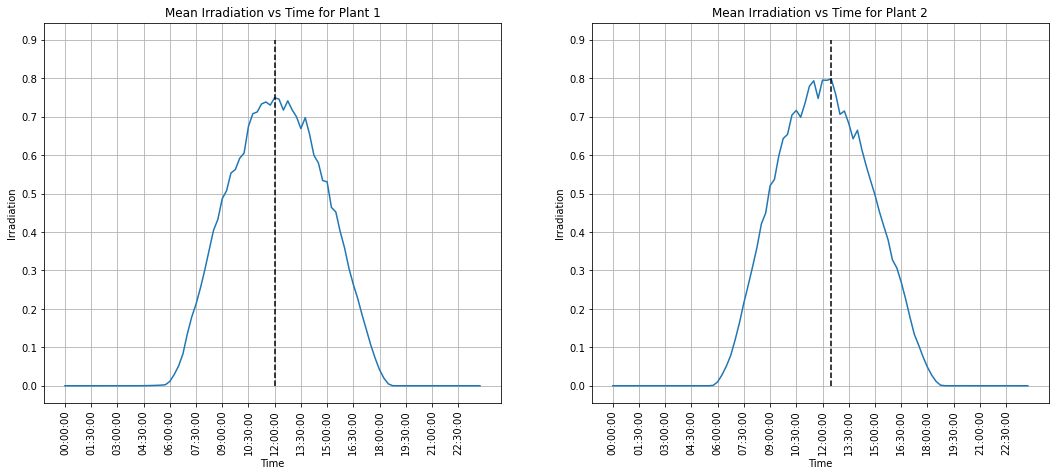

In [83]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,7))
axes[0].plot(times, p1_wea.groupby('TIME').mean().IRRADIATION)
axes[0].plot([times[48], times[48]], [0, 0.9], "k--")
axes[0].set_xticks(times[::6]) 
axes[0].set_yticks(np.arange(0,1,0.1)) 
axes[0].tick_params(axis = "x", rotation = 90)
axes[0].set_title('Mean Irradiation vs Time for Plant 1')
axes[0].grid()
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Irradiation')
###############################################################
axes[1].plot(times, p2_wea.groupby('TIME').mean().IRRADIATION)
axes[1].plot([times[50], times[50]], [0, 0.9], "k--")
axes[1].set_xticks(times[::6])
axes[1].set_yticks(np.arange(0,1,0.1)) 
axes[1].tick_params(axis = "x", rotation = 90) 
axes[1].set_title('Mean Irradiation vs Time for Plant 2')
axes[1].grid()
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Irradiation')

In [84]:
times_day = [str(time) for time in sorted(list(set(p1_wea.DATE)))]

Text(0, 0.5, 'Irradiation')

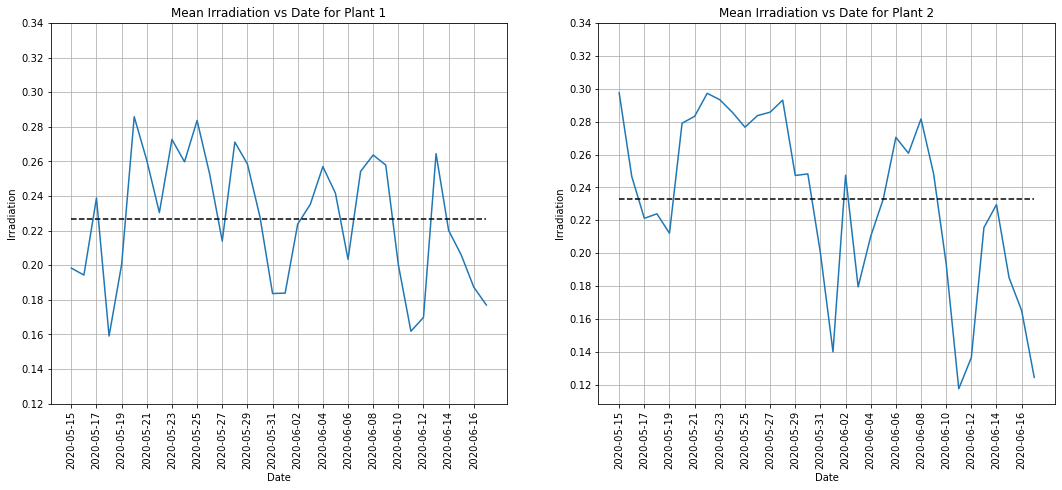

In [85]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,7))
axes[0].plot(times_day, p1_wea.groupby('DATE').mean().IRRADIATION)
axes[0].plot([times_day[0], times_day[-1]], 
         [p1_wea.groupby('DATE').mean().IRRADIATION.mean(), 
          p1_wea.groupby('DATE').mean().IRRADIATION.mean()],
        'k--') 
axes[0].set_xticks(times_day[::2])
axes[0].set_yticks(np.arange(0.12, 0.34, 0.02))
axes[0].tick_params(axis = "x", rotation = 90)
axes[0].set_title('Mean Irradiation vs Date for Plant 1')
axes[0].grid()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Irradiation')
###############################################################
axes[1].plot(times_day, p2_wea.groupby('DATE').mean().IRRADIATION)
axes[1].plot([times_day[0], times_day[-1]], 
         [p2_wea.groupby('DATE').mean().IRRADIATION.mean(), 
          p2_wea.groupby('DATE').mean().IRRADIATION.mean()],
        'k--') 
axes[1].set_xticks(times_day[::2]) 
axes[1].set_yticks(np.arange(0.12, 0.34, 0.02))
axes[1].tick_params(axis = "x", rotation = 90)
axes[1].set_title('Mean Irradiation vs Date for Plant 2')
axes[1].grid()
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Irradiation')

### How are AMBIENT TEMPERATURE changing as time goes by?

Text(0, 0.5, 'Ambient Temperature')

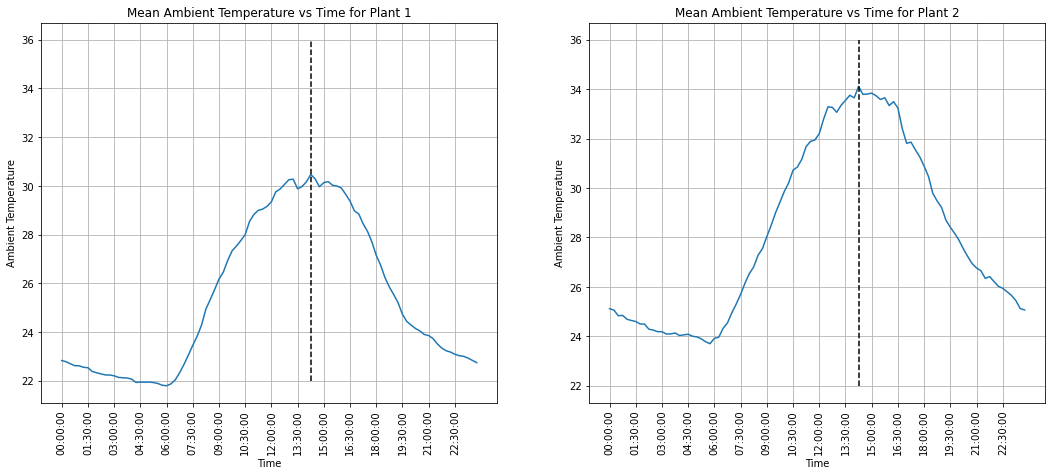

In [86]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,7))
axes[0].plot(times, p1_wea.groupby('TIME').median().AMBIENT_TEMPERATURE)
axes[0].plot([times[57], times[57]], [22, 36], "k--")
axes[0].set_xticks(times[::6]) 
axes[0].set_yticks(np.arange(22, 38, 2)) 
axes[0].tick_params(axis = "x", rotation = 90)
axes[0].set_title('Mean Ambient Temperature vs Time for Plant 1')
axes[0].grid()
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Ambient Temperature')
###############################################################
axes[1].plot(times, p2_wea.groupby('TIME').median().AMBIENT_TEMPERATURE)
axes[1].plot([times[57], times[57]], [22, 36], "k--")
axes[1].set_xticks(times[::6])
axes[1].set_yticks(np.arange(22, 38, 2)) 
axes[1].tick_params(axis = "x", rotation = 90) 
axes[1].set_title('Mean Ambient Temperature vs Time for Plant 2')
axes[1].grid()
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Ambient Temperature')

In [87]:
axes[0].plot(times_day, p1_wea.groupby('DATE').mean().AMBIENT_TEMPERATURE)
axes[0].plot([times_day[0], times_day[-1]], 
         [p1_wea.groupby('DATE').mean().AMBIENT_TEMPERATURE.mean(), 
          p1_wea.groupby('DATE').mean().AMBIENT_TEMPERATURE.mean()],
        'k--') 
axes[0].set_xticks(times_day[::2])
axes[0].set_yticks(np.arange(24, 32, 1))
axes[0].tick_params(axis = "x", rotation = 90)
axes[0].set_title('Mean Ambient Temperature vs Date for Plant 1')
axes[0].grid()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Ambient Temperature')
###############################################################
axes[1].plot(times_day, p2_wea.groupby('DATE').mean().AMBIENT_TEMPERATURE)
axes[1].plot([times_day[0], times_day[-1]], 
         [p2_wea.groupby('DATE').mean().AMBIENT_TEMPERATURE.mean(), 
          p2_wea.groupby('DATE').mean().AMBIENT_TEMPERATURE.mean()],
        'k--') 
axes[1].set_xticks(times_day[::2]) 
axes[1].set_yticks(np.arange(24, 32, 1))
axes[1].tick_params(axis = "x", rotation = 90)
axes[1].set_title('Mean Ambient Temperature vs Date for Plant 2')
axes[1].grid()
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Ambient Temperature')

Text(565.0545454545454, 0.5, 'Ambient Temperature')

### How are MODULE TEMPERATURE changing as time goes by?

Text(0, 0.5, 'Module Temperature')

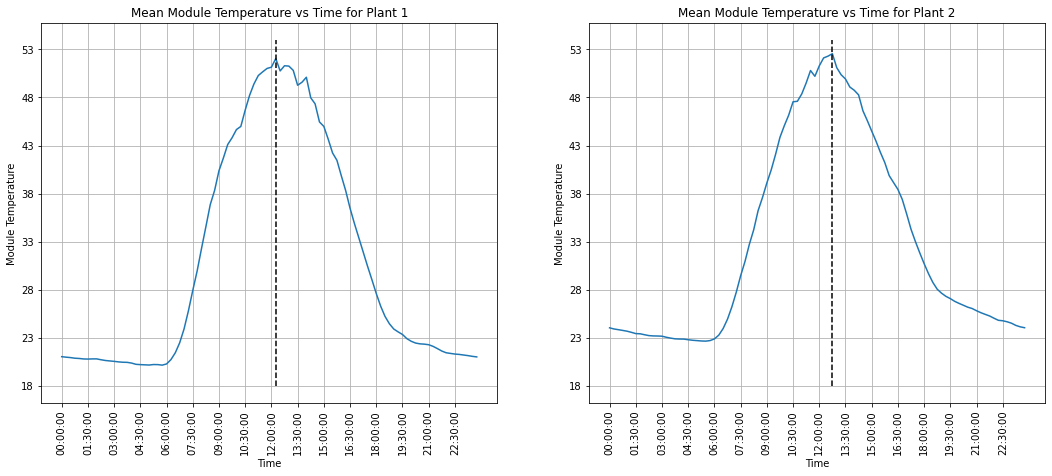

In [88]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,7))
axes[0].plot(times, p1_wea.groupby('TIME').mean().MODULE_TEMPERATURE)
axes[0].plot([times[49], times[49]], [18, 54], "k--")
axes[0].set_xticks(times[::6]) 
axes[0].set_yticks(np.arange(18,54,5)) 
axes[0].tick_params(axis = "x", rotation = 90)
axes[0].set_title('Mean Module Temperature vs Time for Plant 1')
axes[0].grid()
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Module Temperature')
###############################################################
axes[1].plot(times, p2_wea.groupby('TIME').mean().MODULE_TEMPERATURE)
axes[1].plot([times[51], times[51]], [18, 54], "k--")
axes[1].set_xticks(times[::6])
axes[1].set_yticks(np.arange(18,54,5)) 
axes[1].tick_params(axis = "x", rotation = 90) 
axes[1].set_title('Mean Module Temperature vs Time for Plant 2')
axes[1].grid()
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Module Temperature')

Text(0, 0.5, 'Module Temperature')

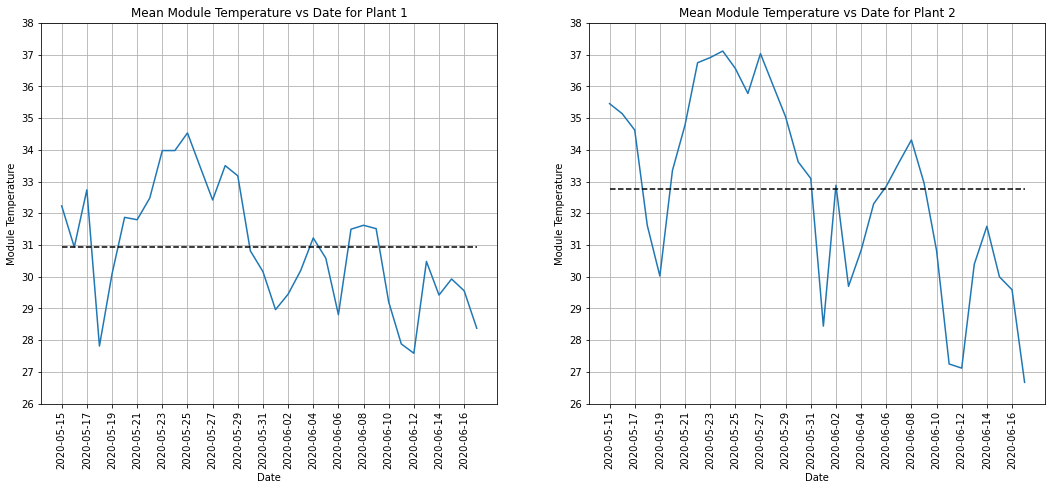

In [89]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,7))
axes[0].plot(times_day, p1_wea.groupby('DATE').mean().MODULE_TEMPERATURE)
axes[0].plot([times_day[0], times_day[-1]], 
         [p1_wea.groupby('DATE').mean().MODULE_TEMPERATURE.mean(), 
          p1_wea.groupby('DATE').mean().MODULE_TEMPERATURE.mean()],
        'k--') 
axes[0].set_xticks(times_day[::2])
axes[0].set_yticks(np.arange(26, 39, 1))
axes[0].tick_params(axis = "x", rotation = 90)
axes[0].set_title('Mean Module Temperature vs Date for Plant 1')
axes[0].grid()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Module Temperature')
###############################################################
axes[1].plot(times_day, p2_wea.groupby('DATE').mean().MODULE_TEMPERATURE)
axes[1].plot([times_day[0], times_day[-1]], 
         [p2_wea.groupby('DATE').mean().MODULE_TEMPERATURE.mean(), 
          p2_wea.groupby('DATE').mean().MODULE_TEMPERATURE.mean()],
        'k--') 
axes[1].set_xticks(times_day[::2]) 
axes[1].set_yticks(np.arange(26, 39, 1))
axes[1].tick_params(axis = "x", rotation = 90)
axes[1].set_title('Mean Module Temperature vs Date for Plant 2')
axes[1].grid()
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Module Temperature')

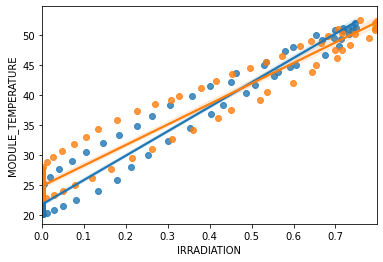

In [90]:
sns.regplot(x = p1_wea.groupby(by = 'TIME').mean().IRRADIATION, y = p1_wea.groupby(by = 'TIME').mean().MODULE_TEMPERATURE)
sns.regplot(x = p2_wea.groupby(by = 'TIME').mean().IRRADIATION, y = p2_wea.groupby(by = 'TIME').mean().MODULE_TEMPERATURE)

# Forecast

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

### Time series analysis

In [92]:
def ts_daily_yield(data):
    '''Select the DATE_TIME and DAILY_YIELD columns with which we will estimate the model.
    
    Args:
        data (pd.DataFrame)
        
    Returns:
        pd.DataFrame
    '''
    index = pd.to_datetime(data.groupby('DATE_TIME').sum().index.values)
    daily_sum = np.array(data.groupby('DATE_TIME').sum().DAILY_YIELD)
    series = pd.DataFrame()
    series['DATE_TIME'] = index
    series['DAILY_YIELD'] = daily_sum
    series.set_index('DATE_TIME', inplace = True)
    return series

ts_1 = ts_daily_yield(p1_gen)
ts_2 = ts_daily_yield(p2_gen)

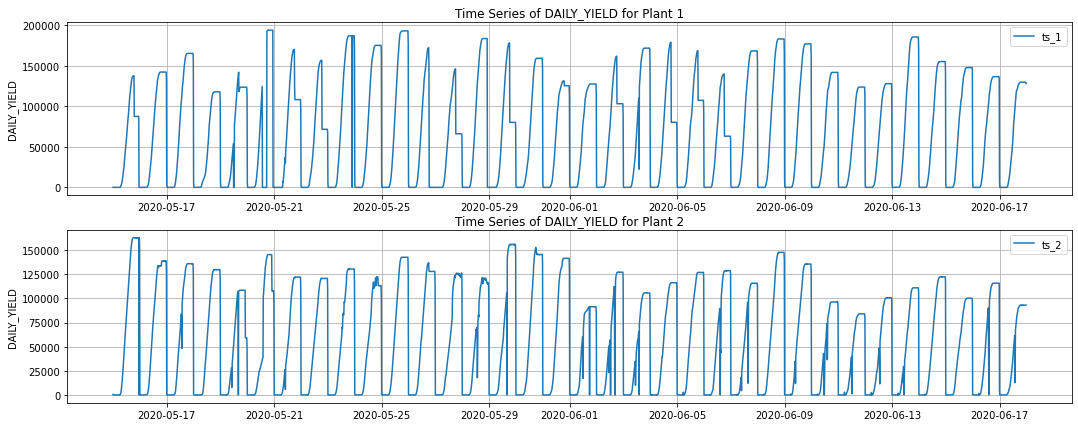

In [93]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (18,7))
axes[0].plot(ts_1, label = 'ts_1')
axes[0].grid()
axes[0].set_title('Time Series of DAILY_YIELD for Plant 1')
axes[0].set_ylabel('DAILY_YIELD')
axes[0].legend()
axes[1].plot(ts_2, label = 'ts_2')
axes[1].grid()
axes[1].set_title('Time Series of DAILY_YIELD for Plant 2')
axes[1].set_ylabel('DAILY_YIELD')
axes[1].legend()
plt.show()

###### Statistical test on time series

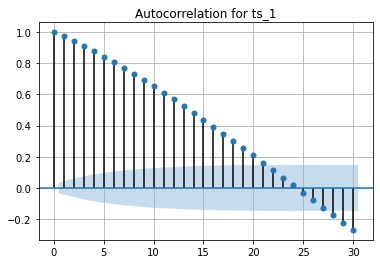

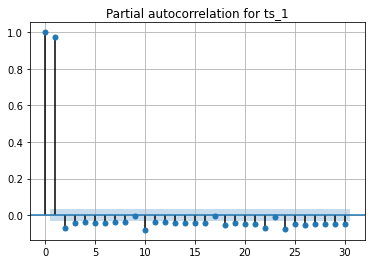

In [94]:
plot_acf(ts_1, lags = 30, alpha = 0.05, title = 'Autocorrelation for ts_1')
plt.grid()
plot_pacf(ts_1, lags = 30, alpha = 0.05, title = 'Partial autocorrelation for ts_1')
plt.grid()

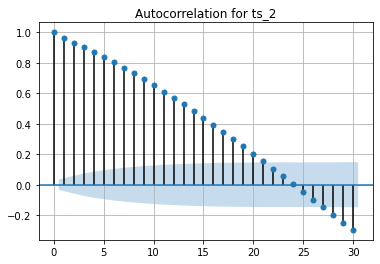

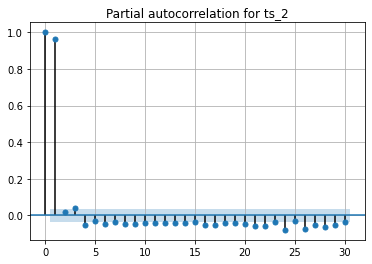

In [95]:
plot_acf(ts_2, lags = 30, alpha = 0.05, title = 'Autocorrelation for ts_2')
plt.grid()
plot_pacf(ts_2, lags = 30, alpha = 0.05, title = 'Partial autocorrelation for ts_2')
plt.grid()

As we can see, given that both the autocorrelation are significant since the first lags and given the general trend of both the autocorrelation functions and partial autocorrelation functions, we can say that the time series has a structure to be modeled. To confirm that we are dealing with autocorrelated time series we will use the Durbin-Watson test.

In [96]:
DW_test_1 = durbin_watson(ts_1)
print('Durbin-Watson test for ts_1: {}\n'.format(DW_test_1[0]))
DW_test_2 = durbin_watson(ts_2)
print('Durbin-Watson test for ts_2: {}'.format(DW_test_2[0]))

Durbin-Watson test for ts_1: 0.025667925356789703

Durbin-Watson test for ts_2: 0.032854945056795384


Given that the closer to 0 the statistic is, the more evidence for positive serial correlation, we cannot reject the hyphothesis of no autocorrelation. We can conclude that both time series are autocorrelated.
Now we need to investigate whether the time series is stationary or not. To do this we will use the Dickey-Fuller statistics.

In [98]:
stat_1 = adfuller(ts_1)
print('''ts_1 
    T val: {}    
    p-value: {}\n'''.format(stat_1[0], stat_1[1]))

stat_2 = adfuller(ts_2)
print('''ts_2 
    T val: {}    
    p-value: {}'''.format(stat_2[0], stat_2[1]))

ts_1 
    T val: -14.486240197641745    
    p-value: 6.254316163677483e-27

ts_2 
    T val: -15.156647583042439    
    p-value: 6.6800103148690535e-28


Given the p-value obtained in the two tests we can reject the hypothesis H0, therefore we conclude that both time series are stationary.

## Model and forecast

#### Train/Test split

Since model estimation is very time consuming, we extract a subsample of the dataset, the last 7 days, which we will use for estimating and forecasting.

In [99]:
def last_7_days(ts):
    '''Select the last 7 days from the original time series and then it split this new time series in a new training 
       series, composed by the first 6 days, and testing series, composed by the last day.
    
    Args:
        ts (pd.DataFrame)
        
    Returns:
        splitted_series (tuple): A tuple containing the 7-day time series, the time series for training and the 
        time series for testing, respectively.
    '''
    sub_series = ts[-672:]
    train_series = sub_series[:577]
    test_series = sub_series[576:]
    splitted_series = (sub_series, train_series, test_series) 
    return splitted_series

ts_1_last7 = last_7_days(ts_1)
ts_2_last7 = last_7_days(ts_2)

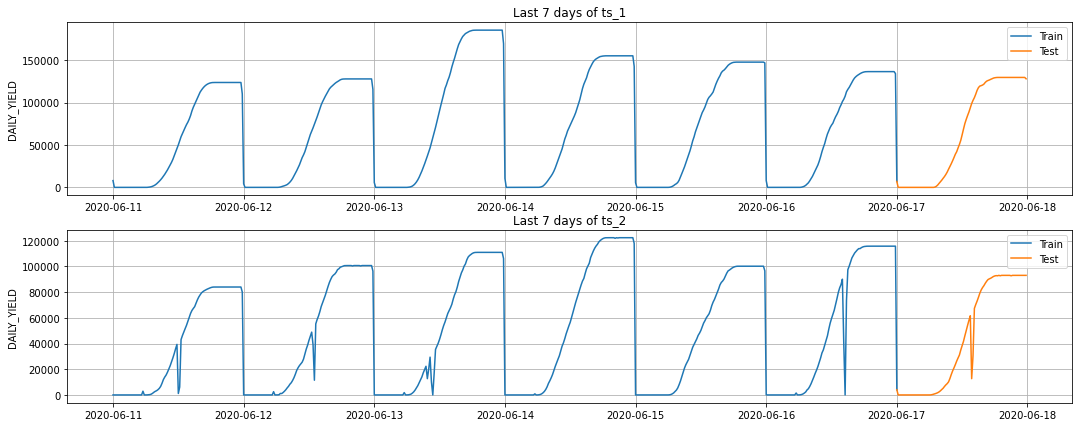

In [100]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (18,7))
axes[0].plot(ts_1_last7[1], label = 'Train')
axes[0].plot(ts_1_last7[2], label = 'Test')
axes[0].set_title('Last 7 days of ts_1')
axes[0].set_ylabel('DAILY_YIELD')
axes[0].legend()
axes[0].grid()
axes[1].plot(ts_2_last7[1], label = 'Train')
axes[1].plot(ts_2_last7[2], label = 'Test')
axes[1].set_title('Last 7 days of ts_2')
axes[1].set_ylabel('DAILY_YIELD')
axes[1].legend()
axes[1].grid()

#### Model fitting

In [101]:
model_1 = ARIMA(ts_1_last7[1], order = (4,1,0), seasonal_order = (0,1,1,96))
model_1_fit = model_1.fit()
model_2 = ARIMA(ts_2_last7[1], order = (4,1,0), seasonal_order = (0,1,1,96))
model_2_fit = model_2.fit()

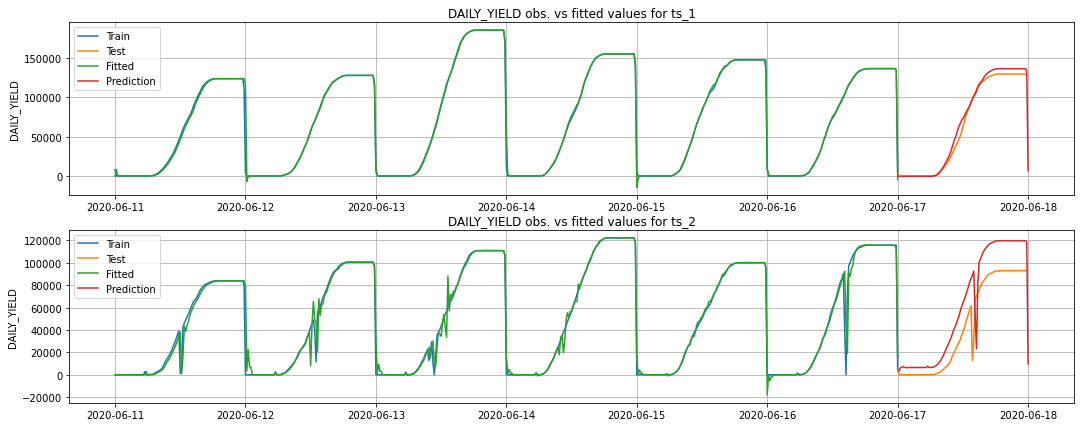

In [102]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (18,7))
axes[0].plot(ts_1_last7[1], label = 'Train')
axes[0].plot(ts_1_last7[2], label = 'Test')
axes[0].plot(model_1_fit.fittedvalues, label = 'Fitted')
axes[0].plot(model_1_fit.forecast(96), label = 'Prediction')
axes[0].set_title('DAILY_YIELD obs. vs fitted values for ts_1')
axes[0].set_ylabel('DAILY_YIELD')
axes[0].legend()
axes[0].grid()
axes[1].plot(ts_2_last7[1], label = 'Train')
axes[1].plot(ts_2_last7[2], label = 'Test')
axes[1].plot(model_2_fit.fittedvalues, label = 'Fitted')
axes[1].plot(model_2_fit.forecast(96), label = 'Prediction')
axes[1].set_title('DAILY_YIELD obs. vs fitted values for ts_2')
axes[1].set_ylabel('DAILY_YIELD')
axes[1].legend()
axes[1].grid()

#### Prediction for 2020-06-18

In [103]:
model_1_tomorrow = ARIMA(ts_1_last7[0], order = (4,1,0), seasonal_order = (0,1,1,96))
model_1_tomorrow_fit = model_1_tomorrow.fit()
model_2_tomorrow = ARIMA(ts_1_last7[0], order = (4,1,0), seasonal_order = (0,1,1,96))
model_2_tomorrow_fit = model_2_tomorrow.fit()

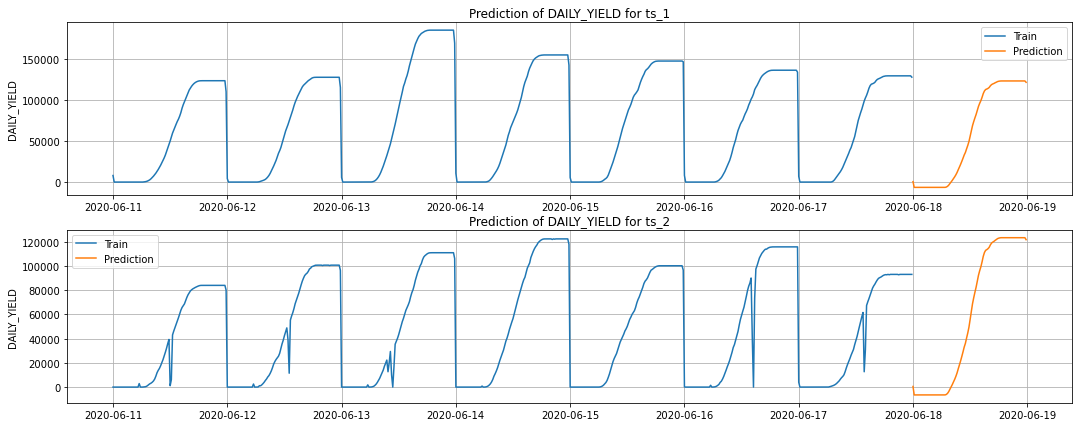

In [104]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (18,7))
axes[0].plot(ts_1_last7[0], label = 'Train')
axes[0].plot(model_1_tomorrow_fit.forecast(96), label = 'Prediction')
axes[0].set_title('Prediction of DAILY_YIELD for ts_1')
axes[0].set_ylabel('DAILY_YIELD')
axes[0].legend()
axes[0].grid()
axes[1].plot(ts_2_last7[0], label = 'Train')
axes[1].plot(model_2_tomorrow_fit.forecast(96), label = 'Prediction')
axes[1].set_title('Prediction of DAILY_YIELD for ts_2')
axes[1].set_ylabel('DAILY_YIELD')
axes[1].legend()
axes[1].grid()